# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [1]:
# Import the libraries required to help with reading and manipulating data:
import pandas as pd
import numpy as np

# To help with data visualization:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation:
from sklearn.impute import SimpleImputer

# To help with model building:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data:
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe:
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe:
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To supress warnings:
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice):
%load_ext nb_black

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
# Loading the training data:
train = pd.read_csv("Train.csv")

<IPython.core.display.Javascript object>

In [3]:
# Load the test data:
test = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

## Overview of Training data:

In [4]:
# Make a copy of the dataset to minimise the risk of losing/altering original data
df1 = train.copy()

<IPython.core.display.Javascript object>

In [5]:
# Get a glimpse of a random selection of the dataset:
np.random.seed(1)  # To ensure the same random selection everytime
# Display the random sample of 10 rows:
df1.sample(n=10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
3841,-1.761,1.726,3.116,-0.722,1.637,-0.666,-1.947,0.341,-0.434,-1.861,-0.749,1.484,3.233,-1.749,-5.028,-1.381,-1.400,2.133,-1.506,-2.451,-4.512,0.036,0.488,2.010,-2.194,5.601,-4.420,-3.459,1.849,3.183,3.132,4.559,5.340,-4.860,3.972,1.084,-0.287,-2.124,0.088,0.467,0
12898,-0.320,-3.223,6.945,-6.074,0.561,-1.151,-1.368,-0.204,-3.530,5.112,-3.729,2.433,3.220,1.317,-1.652,-0.902,-6.406,2.609,-0.584,-3.180,-3.683,-0.108,-3.112,1.133,1.378,2.400,5.679,-3.810,-4.107,-3.610,9.926,2.087,0.300,-0.581,2.850,11.783,-1.036,-2.657,4.049,-0.044,0
15032,3.660,-0.500,1.673,-0.760,-3.447,-0.177,-0.151,-0.962,0.798,-0.378,2.456,1.879,2.194,-1.375,-1.304,-3.646,-1.917,-0.565,3.382,-0.035,-5.565,2.033,-0.868,-1.966,0.320,-0.502,2.028,-0.769,1.731,3.023,-2.706,-3.397,0.712,0.350,5.073,-2.272,-0.377,-0.116,-0.630,-1.382,0
36781,-2.031,-7.076,1.610,-2.808,-2.627,-3.162,-2.402,2.357,-1.255,2.680,-4.866,5.473,5.340,2.597,-5.179,-2.976,-0.569,3.979,1.725,6.054,-5.327,3.561,3.365,-0.392,1.284,-5.200,2.721,-0.473,-4.739,0.070,-1.208,0.449,-5.095,2.979,2.545,7.661,2.722,-5.889,3.234,-2.896,0
9201,-1.167,4.636,-1.012,0.317,3.276,-0.310,1.389,4.652,-4.849,-2.074,3.232,5.033,-2.635,-2.825,1.290,6.432,0.251,-1.082,0.626,-7.338,0.912,-0.579,5.034,8.327,-4.864,5.333,-8.193,-1.594,5.292,6.554,5.234,10.877,8.250,-5.160,4.674,-3.517,-1.730,1.969,-3.425,2.554,0
21288,-3.187,3.811,0.850,1.188,3.332,-1.400,-1.550,0.635,-0.389,-2.849,-3.003,3.367,2.551,-2.366,-6.294,-2.694,1.701,3.319,-0.941,-2.522,-4.691,1.916,4.573,6.015,-3.253,6.472,-7.581,-2.034,-0.284,2.482,0.879,7.500,3.779,-5.057,2.755,-0.313,0.304,0.109,-0.081,-0.264,0
37321,5.670,1.844,7.218,1.555,-3.158,-2.388,-0.937,-2.299,3.368,-0.475,-1.594,-0.763,4.475,-1.536,-2.689,-7.051,-1.965,-2.414,3.769,0.894,-9.227,1.081,-4.955,-3.370,2.380,4.443,3.109,-2.406,-1.815,-1.632,0.736,-4.128,-1.698,-0.145,6.159,-0.502,-2.076,-3.097,0.030,-2.895,0
8600,-2.460,-2.394,3.226,0.063,-0.580,-2.797,-0.635,2.119,-2.977,2.924,-3.355,4.535,0.791,0.388,-0.781,0.137,-0.147,0.194,4.076,1.940,-1.894,0.263,-0.027,3.036,0.127,-0.972,0.182,0.250,-2.563,-0.479,2.430,2.392,-2.040,3.391,2.891,5.109,0.085,-1.349,2.057,-2.480,0
33089,1.001,0.984,-2.561,3.375,2.495,-0.721,0.068,3.662,0.327,-1.763,-3.400,-4.089,-5.766,1.293,4.039,3.405,6.861,-0.479,-3.237,2.401,4.419,-0.394,2.743,4.115,1.275,-1.566,-4.673,2.077,-0.693,-1.068,2.815,5.784,-1.469,-2.905,-2.098,-2.401,-0.437,-3.385,-3.897,3.312,1
39511,-3.649,-1.589,-0.575,0.649,1.330,-2.730,-2.246,2.807,-0.600,-1.071,-5.599,4.039,2.624,0.527,-5.739,-2.257,3.684,4.408,-0.597,3.525,-3.745,3.215,6.282,4.595,-1.080,-0.413,-5.066,-0.157,-3.058,1.399,-1.027,6.162,-1.610,-1.636,1.450,2.772,2.196,-3.788,0.694,-1.008,0


<IPython.core.display.Javascript object>

* This dataset is made entirely of continuous variables except for the dependent variable which is a binary encoded categorical.
* The data has been ciphered therefore limiting the extent to which one can speculate on values, distribution etc. We will take the values as they are, without being able to infer too much from them.

In [6]:
# Show the dimensions of the data set:
print(f"There are {df1.shape[0]} rows and {df1.shape[1]} columns in the train dataset.")

There are 40000 rows and 41 columns in the train dataset.


<IPython.core.display.Javascript object>

In [7]:
# To view the composition of the dataset:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

<IPython.core.display.Javascript object>

* There are missing values in the first 2 columns. The missingness will be explored to help determine the best approach to adopt during preprocessing.

In [8]:
# Find the total number of missing values per column:
df1.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

* There are 46 missing values from "V1" and 39 from "V2". Let's see what these rows look like.

In [9]:
# View the affected rows:
missing1 = df1[df1.isna().any(axis=1)]
missing1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
179,NaN,-3.961,2.788,-4.713,-3.007,-1.541,-0.881,1.477,0.575,-1.101,-1.847,4.541,4.490,0.710,-2.138,-2.026,0.136,2.792,-1.167,4.870,-3.924,1.493,-0.173,-6.471,3.008,-3.134,3.956,-1.898,-0.642,-0.538,-1.876,-8.326,-5.141,1.121,-0.306,5.315,3.750,-5.631,2.372,2.196,0
273,8.340,NaN,4.701,-6.210,-3.452,1.470,1.363,-3.737,2.564,0.580,5.225,-1.100,6.722,0.109,-0.148,-2.254,-9.813,-2.557,-1.523,-5.424,-5.215,-0.194,-5.446,-10.166,2.283,4.110,10.904,-5.266,0.345,-2.668,2.834,-9.074,0.302,-1.630,1.621,1.755,-1.708,-1.411,1.290,0.752,0
1245,-2.049,NaN,-1.624,-3.324,0.152,0.600,-1.813,0.852,-1.523,0.211,-0.460,2.380,1.676,0.529,-3.768,-1.096,-0.785,4.855,-1.961,0.047,-2.195,2.567,3.988,2.068,-1.312,-2.227,-1.315,-0.934,0.535,3.590,-0.471,3.264,2.379,-2.457,1.719,2.537,1.702,-1.435,0.597,0.739,0
1380,-5.419,NaN,-3.573,5.969,-0.206,-1.110,-0.932,3.406,-1.116,0.522,-0.237,-1.565,-4.010,1.380,1.645,4.633,4.978,-2.016,2.710,6.348,5.535,-2.108,1.175,2.906,-1.503,-5.757,-5.848,4.123,1.978,3.739,-3.100,4.859,0.336,3.993,-0.141,-3.344,0.365,-1.403,-1.718,-2.597,1
1912,NaN,-4.396,2.967,0.295,0.731,-1.995,-3.058,1.751,-0.829,1.679,-3.878,-0.523,3.118,2.224,-3.886,1.688,-0.578,1.533,-1.483,4.780,0.522,-2.496,-1.827,-0.987,-0.206,-0.713,-1.621,-1.309,-1.380,-0.199,3.111,3.067,0.170,1.216,-0.165,6.555,1.116,-5.988,2.751,-1.782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36733,-2.377,NaN,-0.009,-1.472,1.295,0.725,-1.123,-3.190,3.251,-4.862,-0.685,2.360,5.432,-2.508,-7.250,-5.571,0.679,4.391,-3.424,-0.273,-4.233,1.505,1.570,-3.372,-1.288,4.813,-2.778,-2.350,0.684,0.351,-5.729,-5.093,0.439,-3.167,-2.713,-0.593,3.229,1.316,2.283,1.152,0
37469,3.318,NaN,4.764,0.240,-2.088,-1.334,-1.327,-1.932,0.877,0.348,-3.028,1.245,0.670,-2.024,-2.077,-7.759,0.721,1.524,3.865,0.973,-7.914,2.973,-2.158,1.690,1.886,1.037,1.037,-0.322,-1.652,-0.070,-0.354,-2.228,-1.213,-0.209,5.786,0.719,-0.702,-0.135,0.212,-1.406,0
37815,-0.119,NaN,3.658,-1.232,1.947,-0.119,0.652,-1.490,-0.034,-2.557,-2.094,2.939,-0.489,-3.372,-0.236,-2.676,1.934,1.647,-0.603,-2.326,-1.779,-0.466,-2.086,0.333,0.671,5.423,-1.576,-1.345,0.404,-2.333,0.960,-4.670,-0.594,-1.651,-1.405,1.531,1.079,2.833,1.451,3.233,0
38038,NaN,5.469,3.926,7.075,-0.581,-5.172,1.416,1.564,-1.077,0.972,-2.842,5.672,0.840,-2.739,-1.000,-3.128,1.469,-5.254,10.643,-1.660,-6.990,2.244,2.018,8.153,-1.743,5.857,-3.551,1.103,-3.914,-0.258,0.645,7.125,-1.795,2.990,8.169,-3.718,-3.769,2.540,-1.295,-6.939,1


<IPython.core.display.Javascript object>

* A total of 85 rows have missing values. We can use the imputer to replace them during preprocessing.

In [10]:
# Check for duplicates:
df1.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicates in this dataset.

In [11]:
# Check the class distribution:
df1["Target"].value_counts()

0    37813
1     2187
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

* This is a noticeably imbalanced distribution of the target variable. This must be taken into account when building the model.

In [12]:
# Get the data summary:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.000,-0.288,3.449,-13.502,-2.751,-0.774,1.837,17.437
V2,39961.000,0.443,3.139,-13.212,-1.638,0.464,2.538,13.089
V3,40000.000,2.506,3.406,-11.469,0.203,2.265,4.585,18.366
V4,40000.000,-0.066,3.437,-16.015,-2.350,-0.124,2.149,13.280
V5,40000.000,-0.045,2.107,-8.613,-1.507,-0.097,1.346,9.403
V6,40000.000,-1.001,2.037,-10.227,-2.363,-1.007,0.374,7.065
V7,40000.000,-0.893,1.757,-8.206,-2.037,-0.935,0.207,8.006
V8,40000.000,-0.563,3.299,-15.658,-2.660,-0.384,1.714,11.679
V9,40000.000,-0.008,2.162,-8.596,-1.494,-0.052,1.426,8.507
V10,40000.000,-0.002,2.183,-11.001,-1.391,0.106,1.486,8.108


<IPython.core.display.Javascript object>

* The prevalence of negative and positive values in relatively high magnitudes indicates a very likely occurence of outliers scattered throughout the dataset.

## Overview of the Test data:

In [13]:
# Make a copy to avoid changes to original data.
df2 = test.copy()

<IPython.core.display.Javascript object>

In [14]:
# See what the test data looks like:
df2.head(10)  # to view the 1st 10 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,-0.733,2.210,8.083,7.063,-1.510,-3.261,-3.334,-3.019,3.557,-1.511,-6.695,-1.937,0.141,-3.471,-4.233,-10.416,5.479,-0.023,6.036,6.603,-8.320,0.104,-6.879,1.457,2.110,3.381,-4.467,0.996,-1.409,-0.694,-2.577,-3.270,-1.806,1.798,5.895,-1.312,-0.765,-1.408,0.557,-4.049,0
2,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
3,3.412,1.153,2.114,-2.275,0.088,-0.010,0.514,-1.371,1.863,-0.031,-0.414,-1.567,3.184,0.864,-0.417,-0.996,-3.087,-0.648,-2.732,-2.056,-1.620,-0.091,-1.512,-3.892,1.646,3.147,4.442,-2.524,-2.434,-4.086,2.828,-2.497,-1.776,-1.712,-1.506,2.242,-0.658,-1.862,0.846,0.857,0
4,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
5,-2.216,1.677,0.799,1.790,-1.294,-1.360,0.222,1.705,-0.732,-1.865,5.009,4.581,4.838,-1.840,-3.493,2.784,-3.152,-3.332,3.620,-1.476,-2.459,-1.484,0.833,-1.459,-4.128,3.670,-3.712,-2.107,4.698,6.186,-2.118,1.964,4.900,0.597,4.501,-3.836,-0.432,-0.339,-0.310,-3.130,1
6,-0.000,-4.352,-0.893,-6.871,-1.060,0.926,-2.323,0.247,0.238,-1.436,-0.220,3.154,5.487,0.864,-6.113,-3.150,-2.177,6.919,-4.953,0.760,-5.043,3.808,4.260,-2.894,0.018,-2.236,1.444,-3.156,0.540,3.222,-1.709,-1.556,0.974,-4.286,0.868,4.262,3.512,-4.309,1.513,2.654,0
7,-0.275,-5.632,4.015,-4.672,-2.987,-2.432,-0.465,2.936,-3.017,3.298,-0.638,5.934,4.613,1.905,-0.955,1.914,-4.322,0.211,2.161,2.140,-2.741,0.094,-0.719,-3.243,1.259,-2.902,5.345,-2.182,-1.440,0.072,3.088,-2.141,-2.716,3.467,2.795,7.989,1.234,-5.018,3.079,-1.063,0
8,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
9,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


<IPython.core.display.Javascript object>

* The data is characteristically identical to the Train dataset.

In [15]:
# To capture the dimensions of the data set:
print(f"There are {df2.shape[0]} rows and {df2.shape[1]} columns in the test dataset.")

There are 10000 rows and 41 columns in the test dataset.


<IPython.core.display.Javascript object>

In [16]:
# Composition of the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      9989 non-null   float64
 1   V2      9993 non-null   float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

<IPython.core.display.Javascript object>

* Missingness is again observed on the first 2 columns of this dataset.

In [17]:
# Count the total missing values:
df2.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

* There are 11 missing in "V1" and 7 from "V2" for this dataset.

In [18]:
# View the affected rows:
missing2 = df2[df2.isna().any(axis=1)]
missing2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
1081,NaN,-1.040,6.532,-3.001,-2.063,-1.666,-0.338,-1.132,-0.685,2.505,-1.998,2.761,3.300,-0.386,-1.010,-3.729,-3.860,0.021,2.760,-0.778,-5.862,0.785,-3.836,-1.769,2.231,1.903,5.533,-2.347,-2.734,-2.729,3.692,-3.676,-2.199,1.402,3.757,5.739,-0.775,-1.497,2.533,-1.179,0
1384,3.171,NaN,-0.900,-7.687,-1.844,2.230,0.650,0.681,-0.080,-3.927,4.527,4.481,2.532,-1.379,-0.470,0.339,-1.503,3.596,-4.432,-1.595,-1.914,1.550,1.718,-6.421,0.688,-1.331,2.322,-3.057,5.354,3.834,-2.574,-8.570,1.199,-3.747,-0.834,0.365,3.687,-1.451,-0.013,6.570,0
1494,NaN,2.121,1.028,1.539,4.017,-0.898,-3.188,-0.826,0.036,-1.225,-3.824,0.462,3.817,-1.172,-8.737,-3.515,-0.252,4.342,-2.090,-2.237,-4.571,1.303,3.484,6.334,-3.959,6.624,-7.532,-2.432,-1.371,2.232,1.970,10.291,5.641,-5.355,2.754,1.446,-0.331,-0.556,0.981,-2.226,0
1706,NaN,1.481,2.208,-2.550,1.526,-0.965,0.560,3.004,-3.938,0.106,-0.430,4.881,-0.927,-1.458,0.827,2.279,-0.649,0.925,0.425,-4.440,-1.756,0.656,2.249,5.080,-1.172,3.022,-2.138,-1.945,1.109,1.963,5.891,5.094,2.920,-3.081,3.751,2.422,-0.692,-0.183,-0.709,2.499,0
2155,NaN,1.223,7.024,-1.228,-3.386,-1.500,-0.376,-2.898,3.017,0.097,-1.085,-0.252,4.572,-1.200,-1.804,-7.208,-3.333,-1.411,2.531,-0.414,-9.036,1.682,-4.959,-4.605,3.241,3.721,5.975,-2.889,-2.289,-2.824,1.328,-6.401,-2.540,-0.428,4.971,1.229,-1.621,-2.472,0.692,-1.428,0
3330,NaN,-5.281,1.695,-0.787,-1.873,-0.469,-1.970,-2.100,-1.574,4.522,-3.436,1.752,0.003,0.697,-2.146,-4.850,-0.528,3.288,4.183,3.948,-2.204,1.634,-1.960,1.806,1.044,-5.058,2.802,2.138,-3.229,-0.811,-2.193,-1.940,-2.576,5.279,1.557,5.542,1.058,1.697,3.692,-3.802,0
3619,1.256,NaN,1.123,0.348,-0.199,0.543,-0.905,-2.398,0.229,0.245,-1.102,-0.103,-1.055,-1.878,-1.630,-5.523,0.457,2.114,1.989,-1.440,-4.317,2.481,-0.243,3.652,-0.105,1.019,-0.881,0.411,-0.359,1.084,-0.854,0.851,1.658,-1.411,3.587,-1.117,-0.866,2.767,-0.369,-0.864,0
3731,NaN,-0.559,5.316,1.517,-2.304,-1.410,-1.974,-3.082,1.762,1.134,-2.035,-0.215,3.325,-1.222,-4.010,-6.778,-1.631,0.048,4.117,2.201,-6.651,0.629,-4.596,-1.353,0.920,1.737,1.495,-0.772,-1.518,-0.402,-1.275,-3.017,-0.476,1.987,4.541,1.335,-0.813,-0.545,1.923,-4.118,0
3795,-1.273,NaN,4.426,-3.014,-1.295,-0.883,-1.732,0.099,-0.991,2.496,-0.340,0.647,4.520,1.375,-2.711,0.284,-5.134,0.471,-0.247,0.560,-2.493,-1.356,-3.278,-3.226,0.377,0.437,3.394,-2.978,-0.470,0.026,4.026,-0.397,1.190,0.629,2.411,6.167,-0.141,-4.209,2.623,-1.369,0
5541,-2.939,NaN,2.913,1.431,4.003,-4.743,-2.450,3.796,-0.340,-2.898,-7.699,5.244,5.929,-0.707,-8.867,-2.502,2.601,3.720,-1.918,-0.509,-7.622,3.104,7.566,7.144,-2.529,8.021,-8.292,-3.681,-4.419,0.451,4.347,12.078,0.672,-6.354,3.887,3.420,0.507,-5.913,0.214,-0.931,0


<IPython.core.display.Javascript object>

* Same as with train data, missing will be treated using the imputer during preprocessing.

In [19]:
# Check for duplicates:
df2.duplicated().sum()

0

<IPython.core.display.Javascript object>

* No duplicates in this dataset.

In [20]:
# Check class distribution:
df2["Target"].value_counts()

0    9453
1     547
Name: Target, dtype: int64

<IPython.core.display.Javascript object>

* Again, the target column is seen to be heavily imbalanced. This must be considered during model building.

In [21]:
# A summary of the test dataset:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,9989.000,-0.260,3.440,-12.382,-2.700,-0.719,1.861,13.504
V2,9993.000,0.417,3.160,-11.625,-1.701,0.456,2.526,14.079
V3,10000.000,2.555,3.395,-12.941,0.238,2.283,4.656,15.409
V4,10000.000,-0.054,3.462,-14.682,-2.371,-0.169,2.144,12.896
V5,10000.000,-0.085,2.102,-7.712,-1.593,-0.144,1.324,7.673
V6,10000.000,-1.014,2.039,-8.949,-2.377,-1.015,0.354,6.273
V7,10000.000,-0.908,1.737,-8.124,-2.035,-0.938,0.189,7.616
V8,10000.000,-0.599,3.343,-12.710,-2.684,-0.387,1.698,10.792
V9,10000.000,0.026,2.180,-7.570,-1.490,-0.086,1.466,8.851
V10,10000.000,0.019,2.169,-8.291,-1.362,0.150,1.537,7.691


<IPython.core.display.Javascript object>

* Extreme values observed here as well. 
* The datasets appear to represent each other adequately.
* The target variables appear to be similary distributed for both datasets.

## EDA

### Univariate Analysis

### Plotting histograms and boxplots for all the variables:

In [22]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting all the features at once:

In [23]:
# Let us separate the columns for plotting:
hbtr = df1.loc[:, df1.columns != "Target"]  # selects all but the target column.

<IPython.core.display.Javascript object>

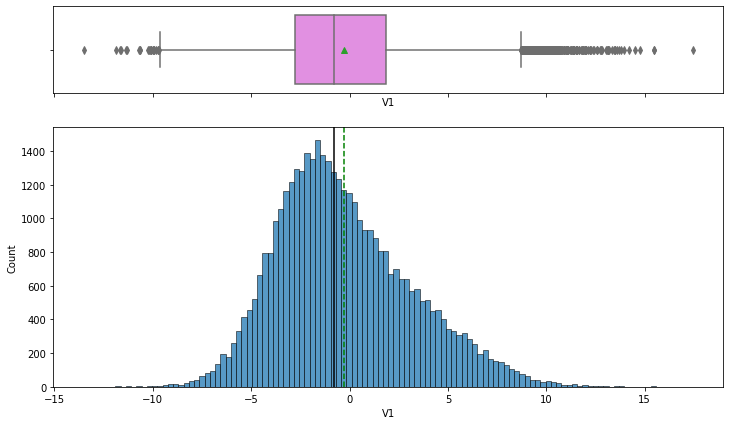

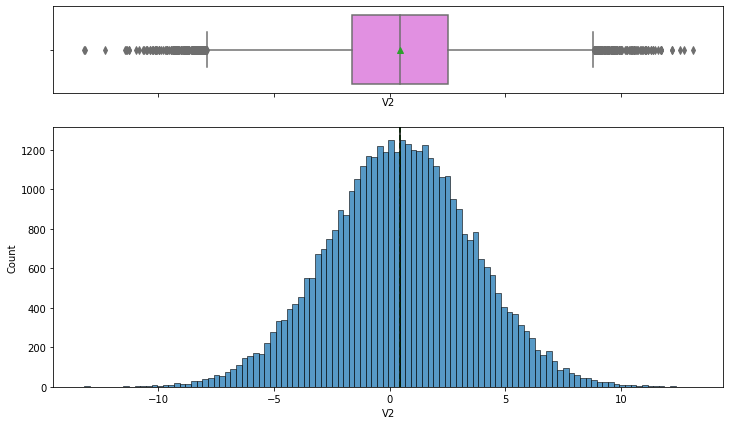

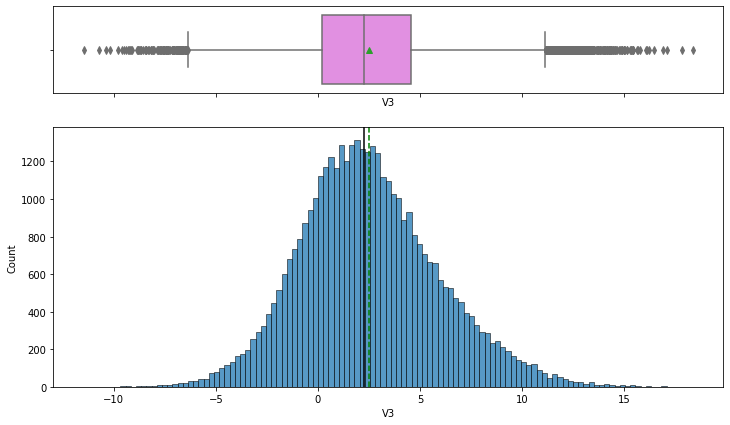

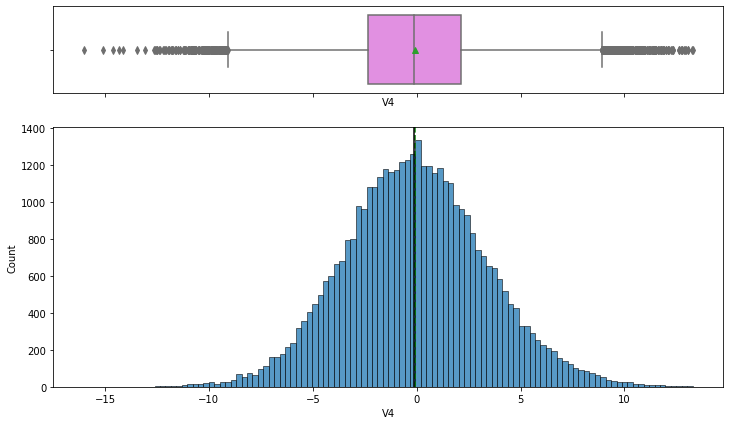

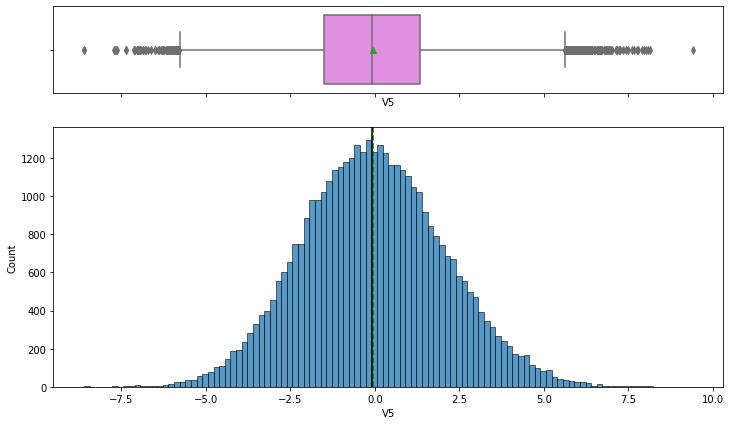

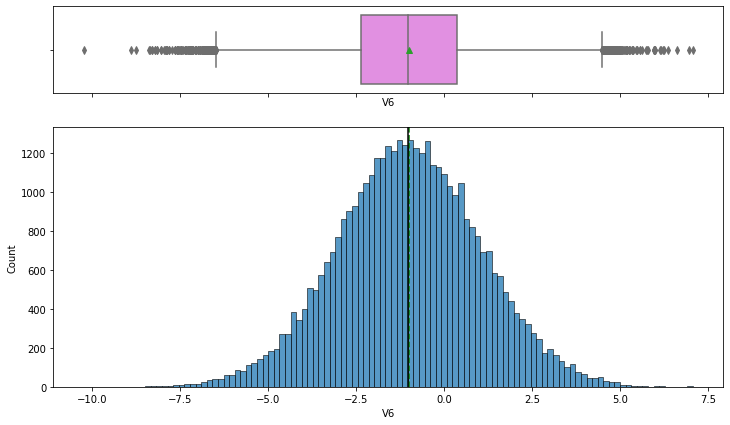

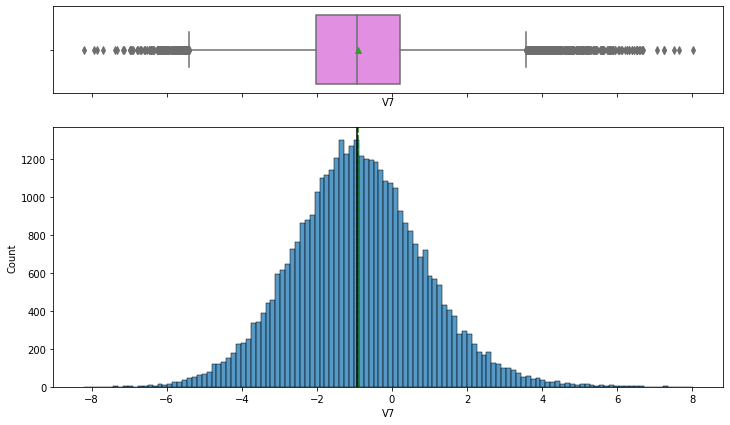

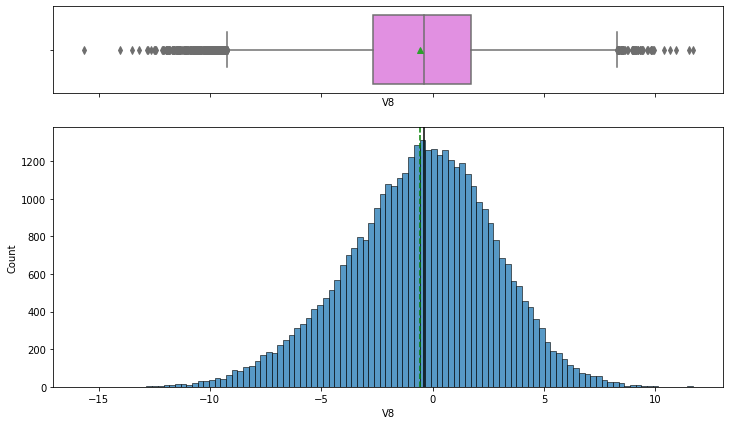

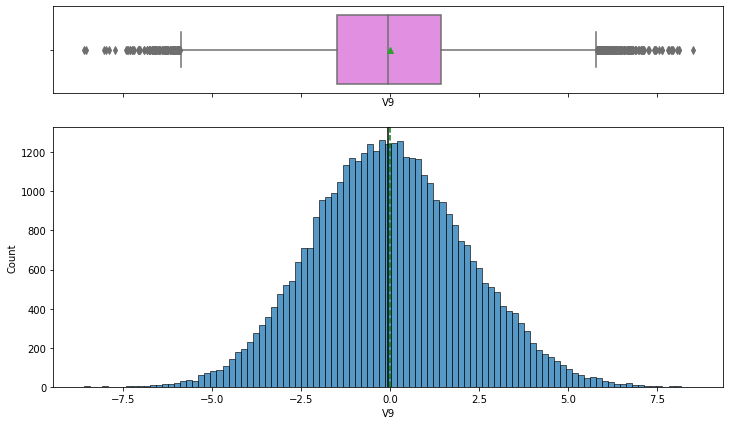

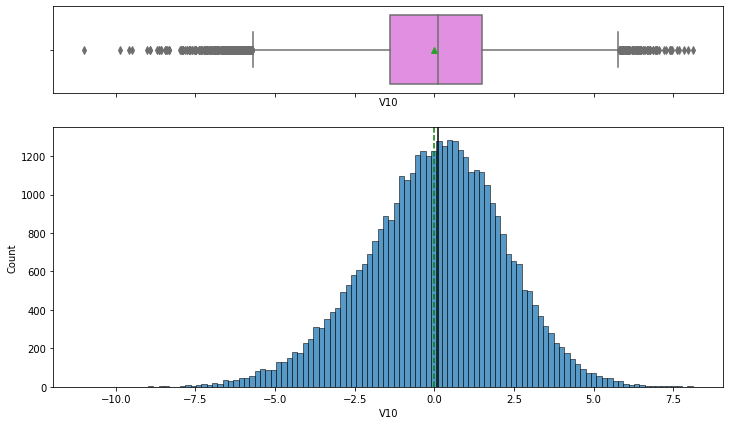

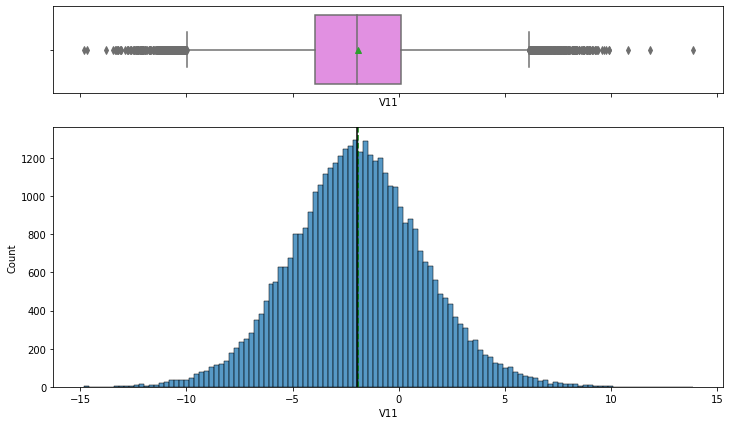

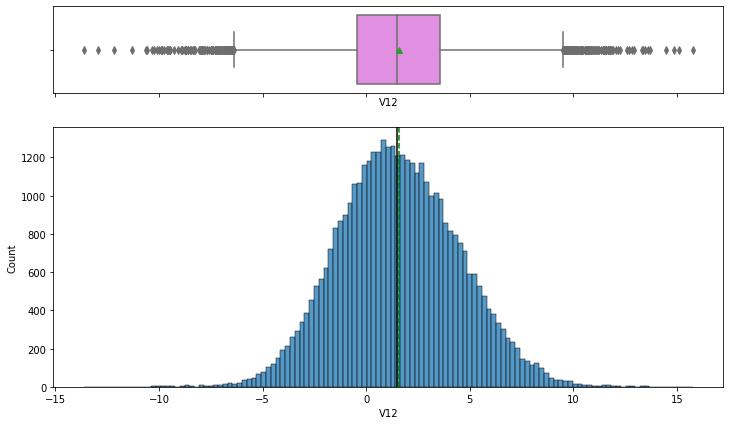

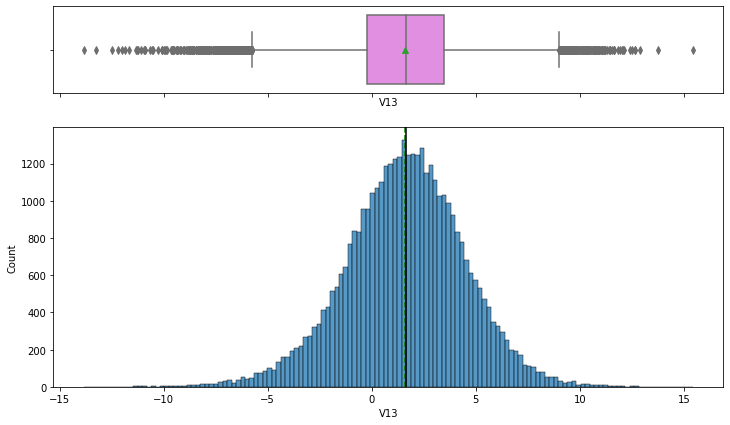

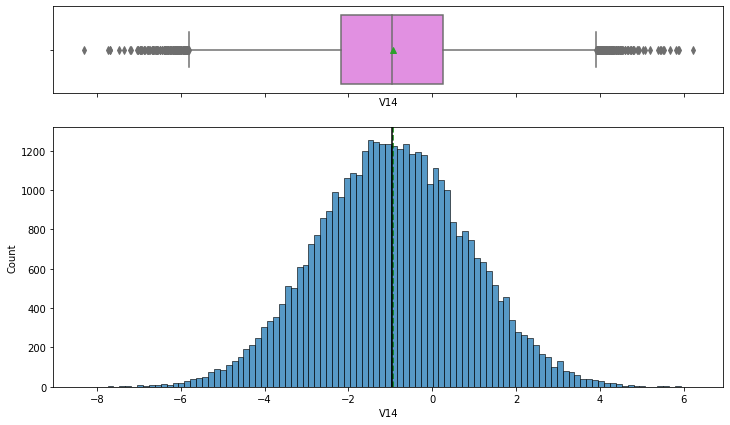

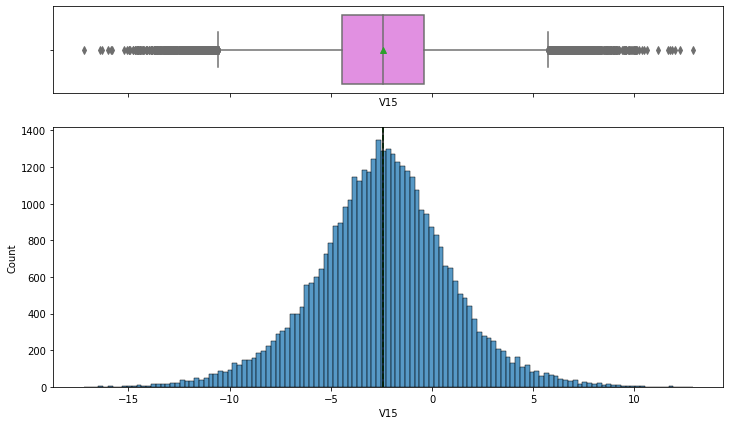

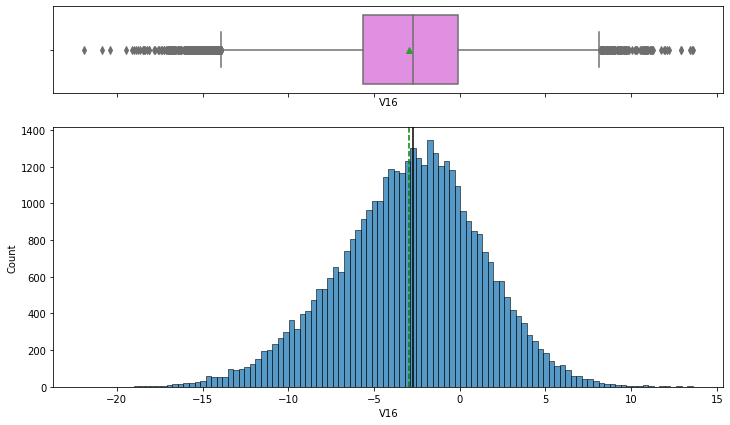

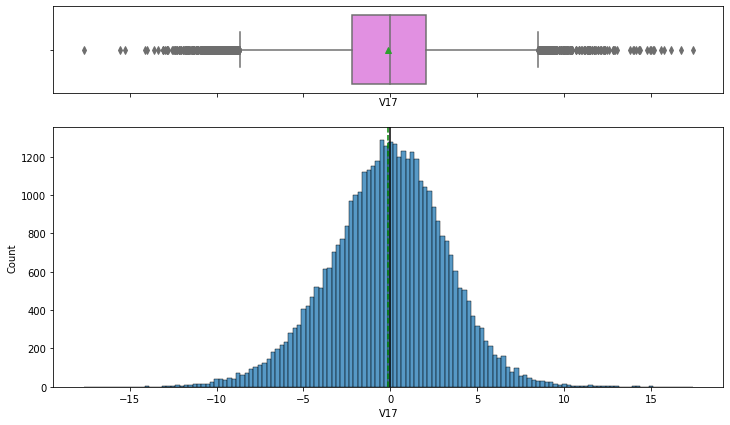

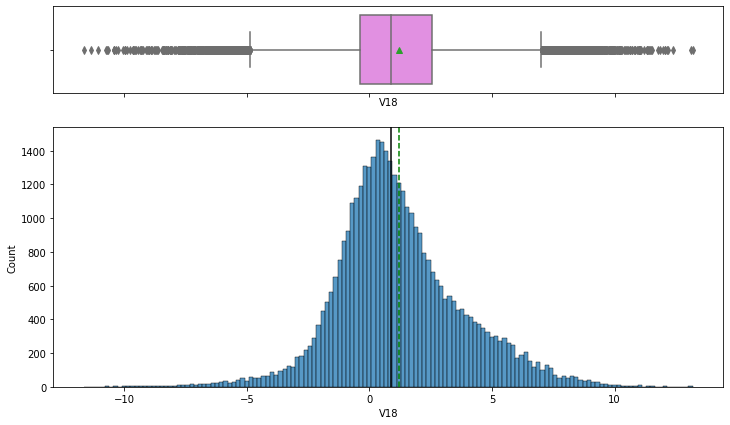

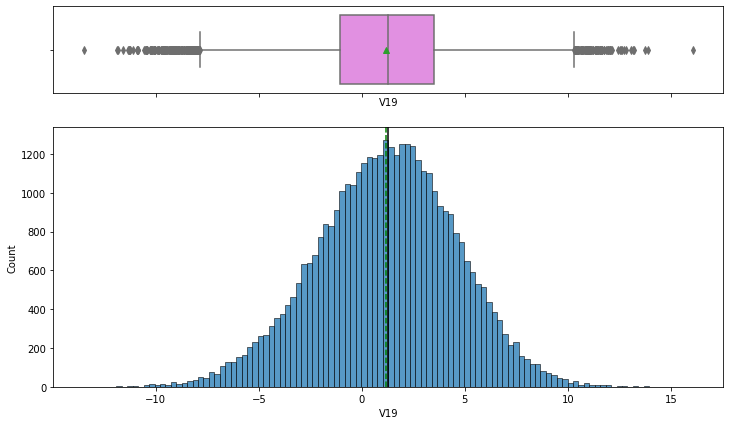

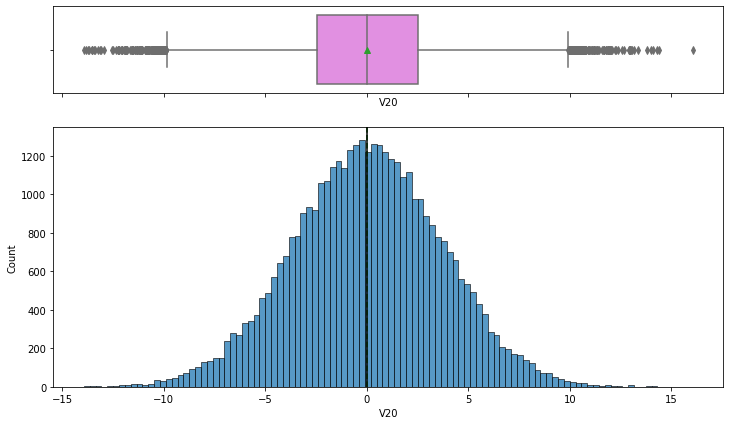

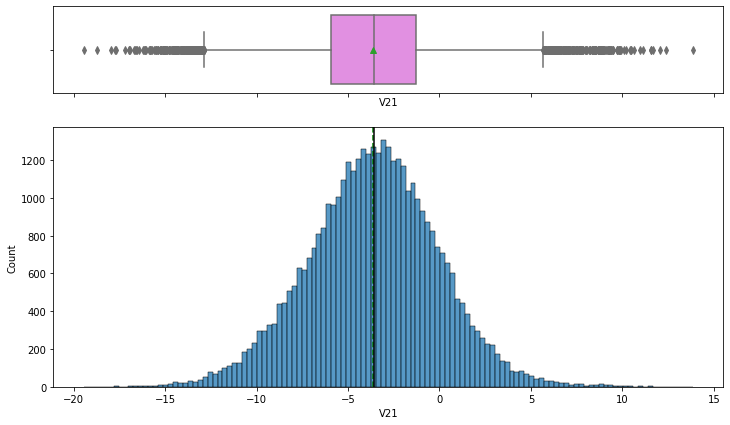

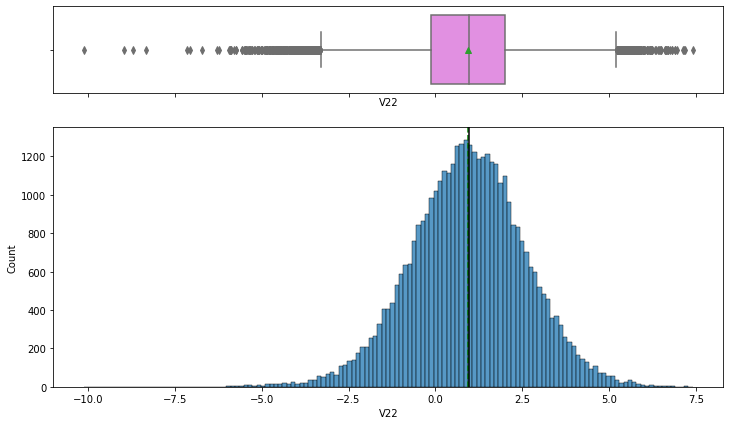

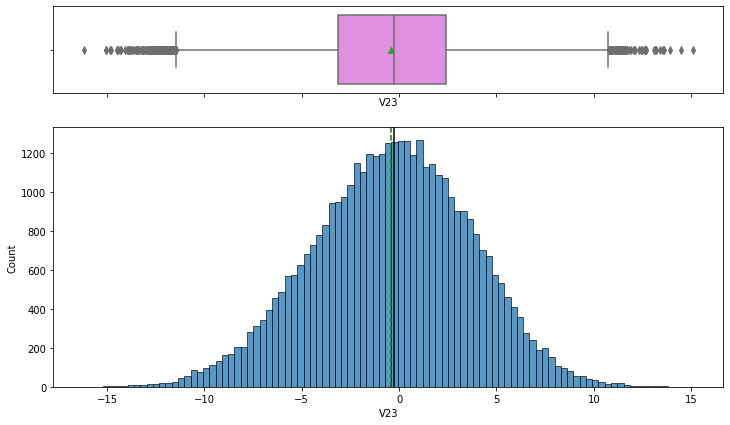

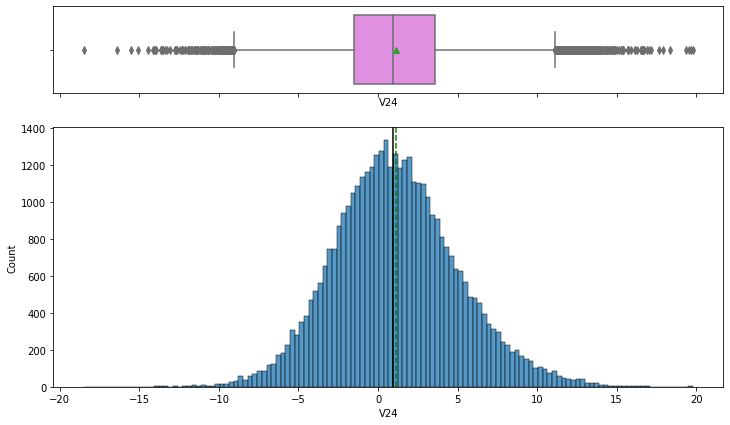

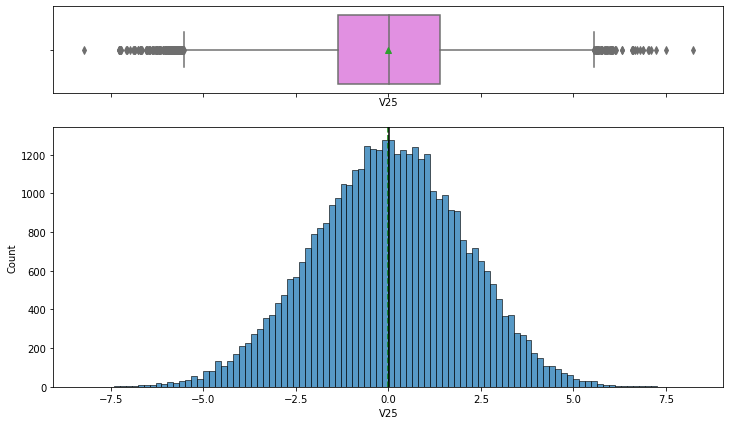

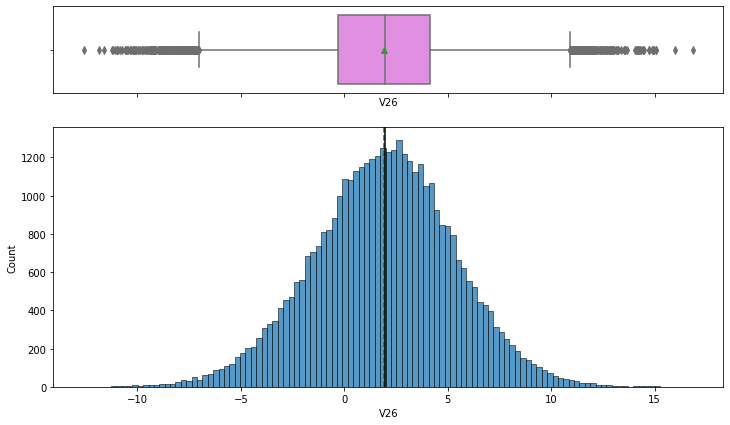

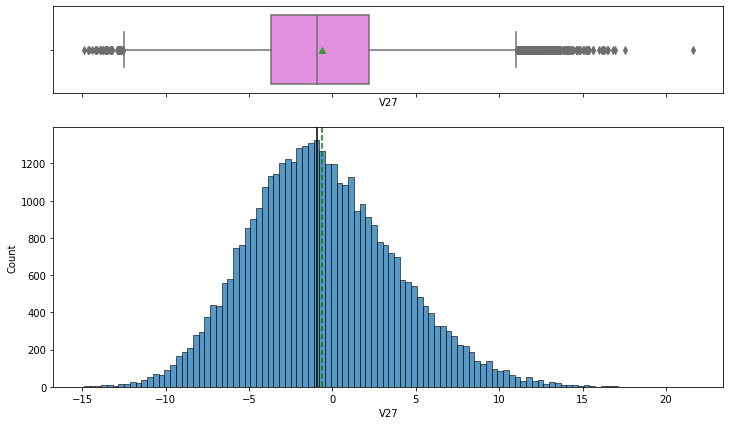

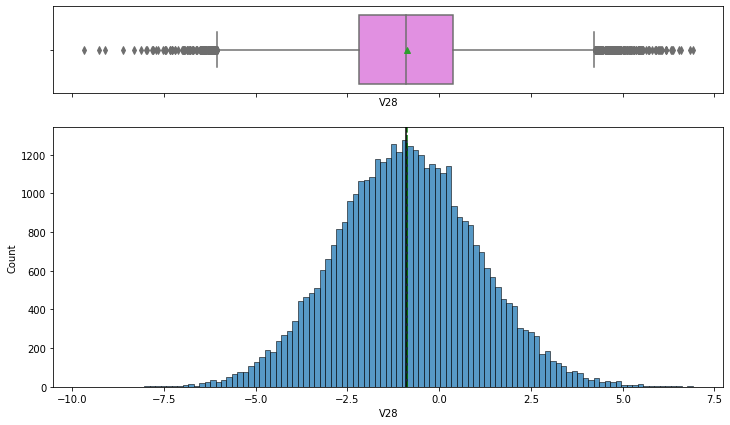

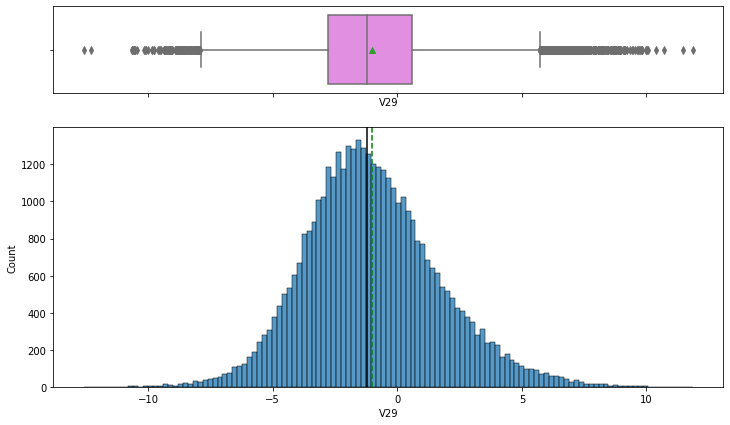

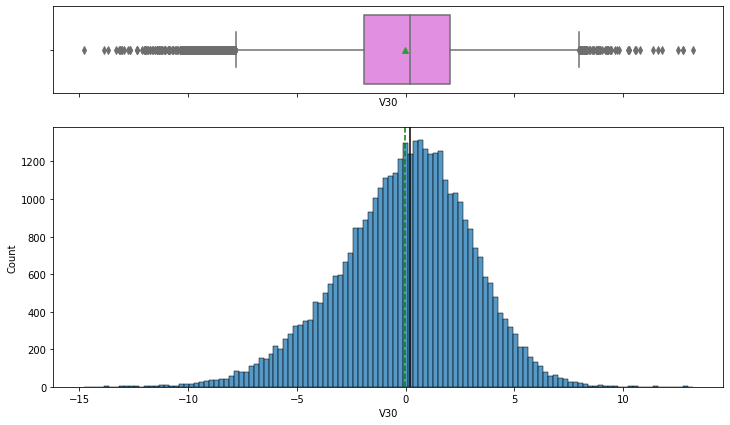

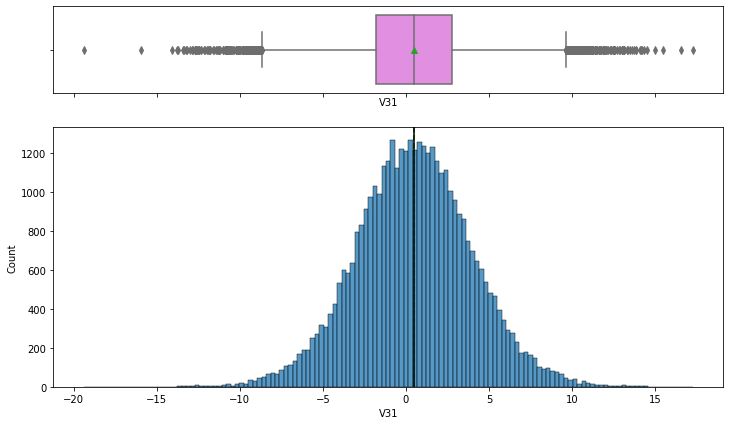

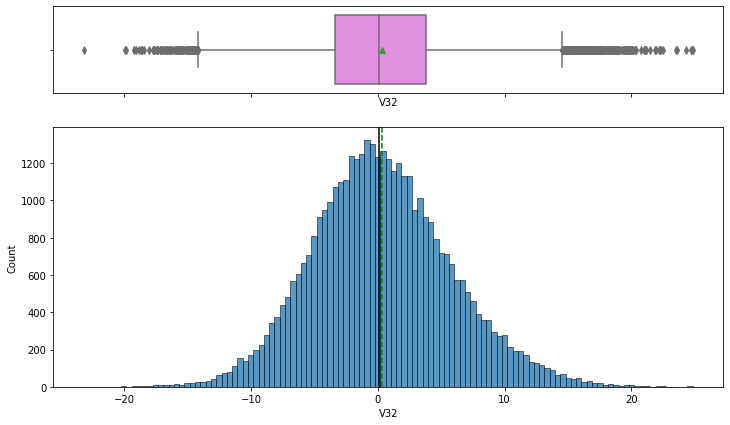

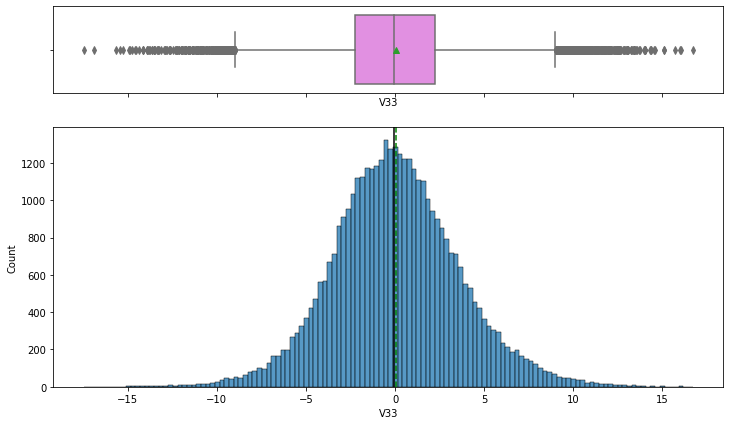

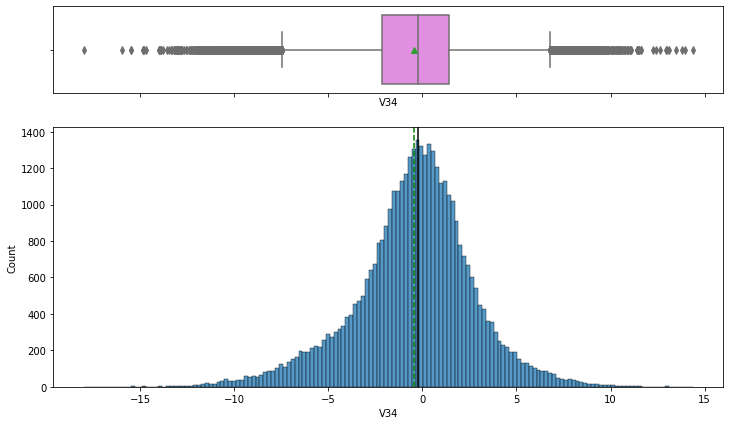

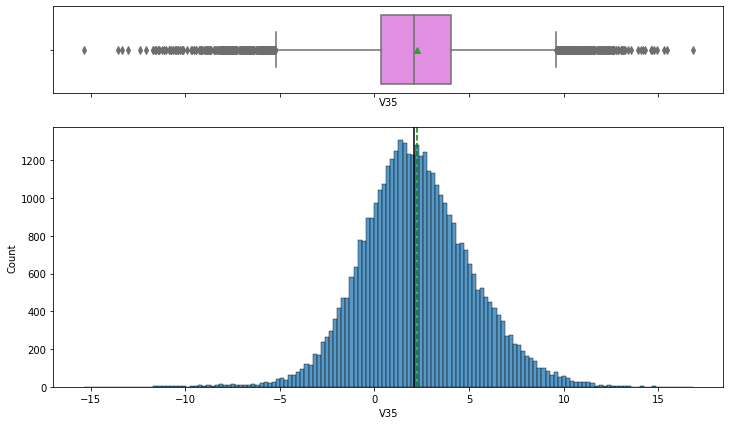

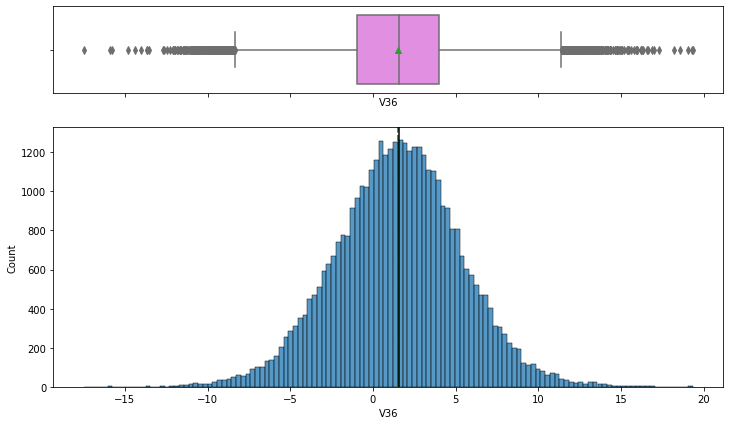

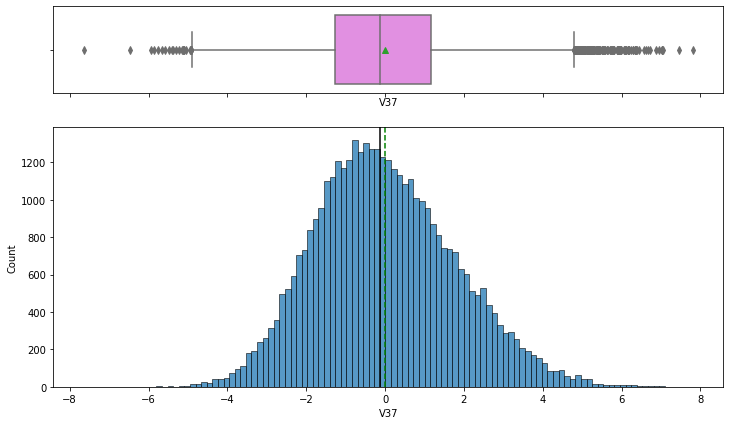

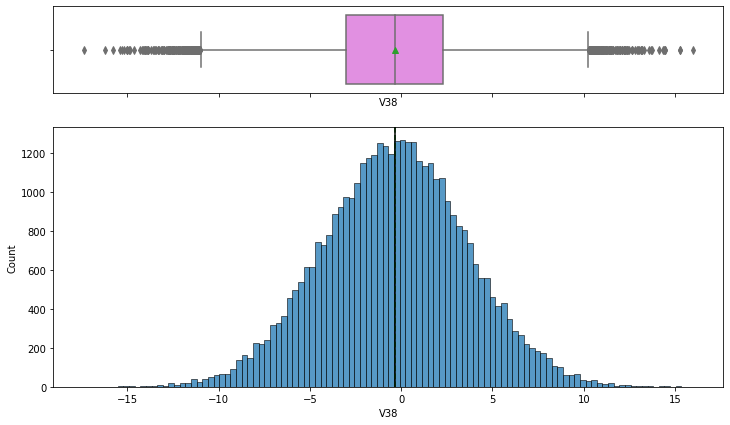

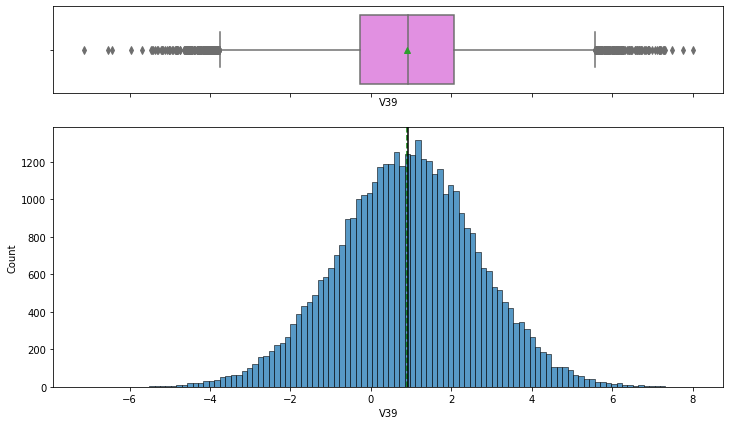

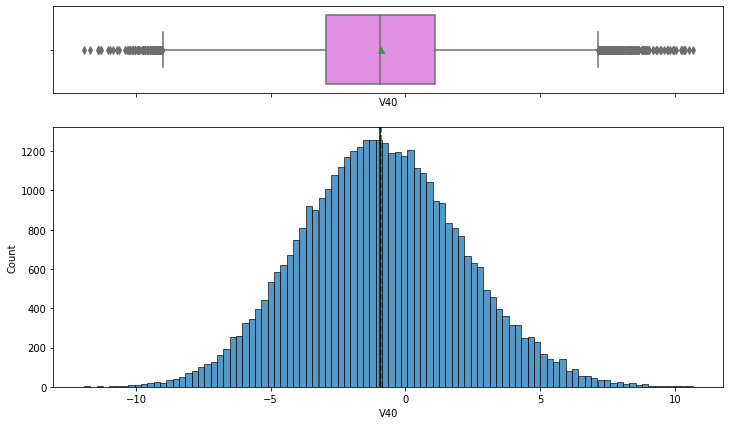

<IPython.core.display.Javascript object>

In [24]:
# Observations on Train dataset excluding "Target":
for feature in hbtr.columns:
    histogram_boxplot(hbtr, feature, figsize=(12, 7), kde=False, bins=None)

**Observations:**

* All variables except are normally distributed, with outliers on both sides as earlier speculated.
* V22 veers too the right a little, but generally maintains a normal distribution.

In [25]:
# Again selecting columns:
hbte = df2.loc[:, df2.columns != "Target"]  # select all but the target column.

<IPython.core.display.Javascript object>

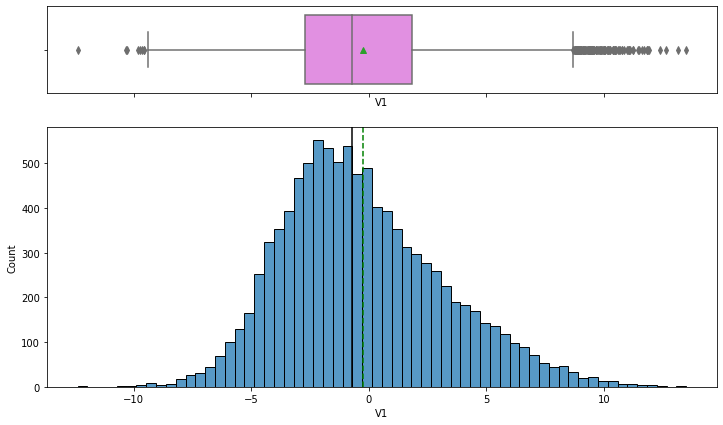

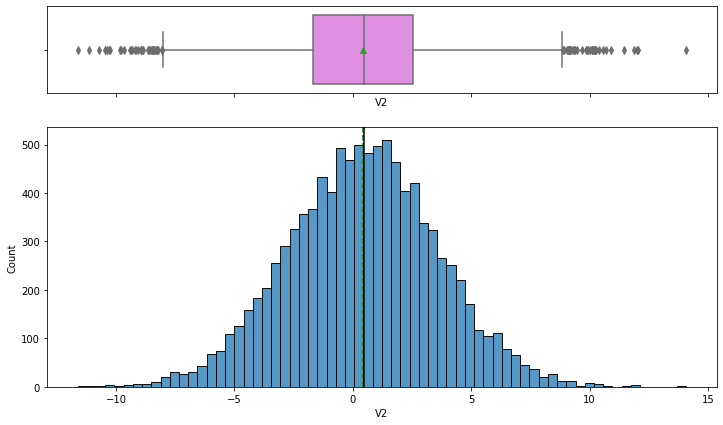

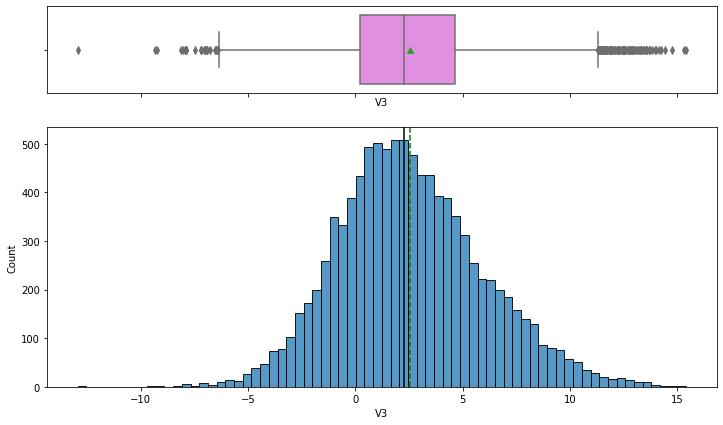

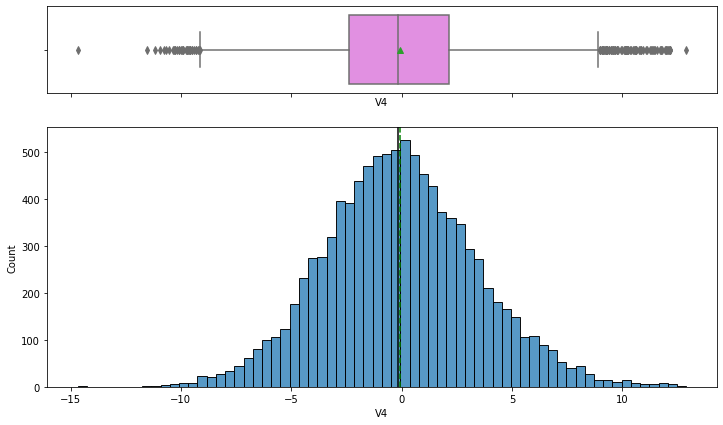

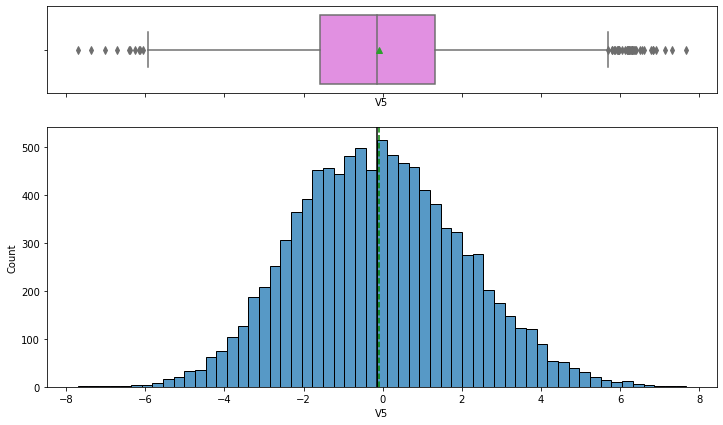

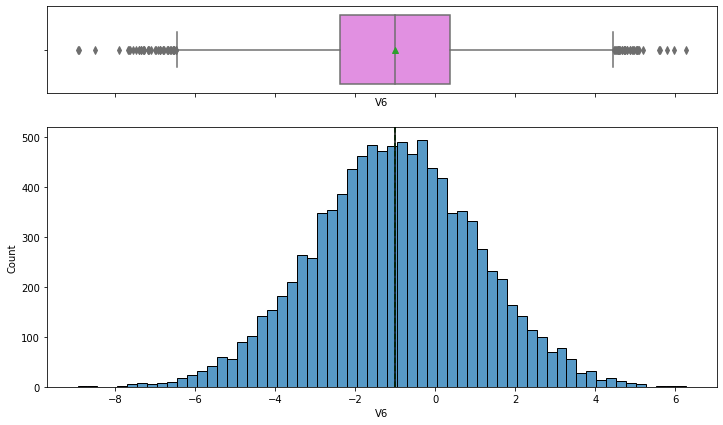

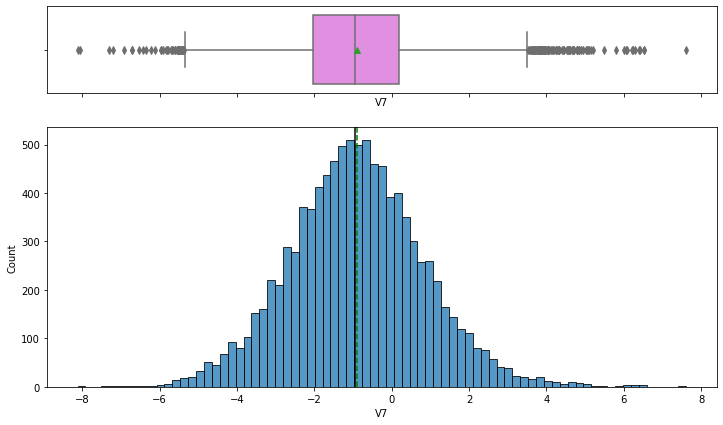

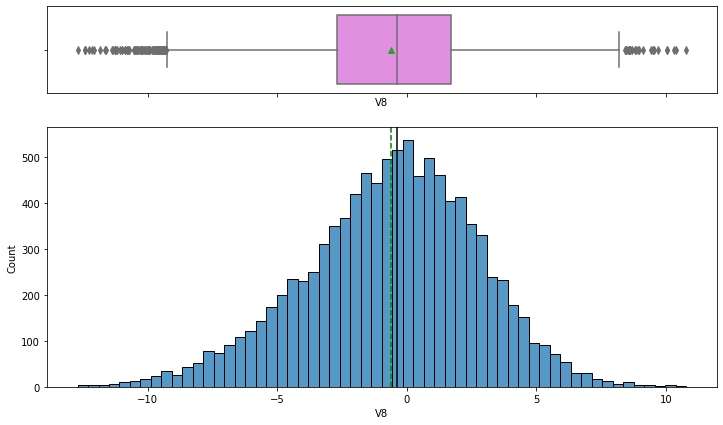

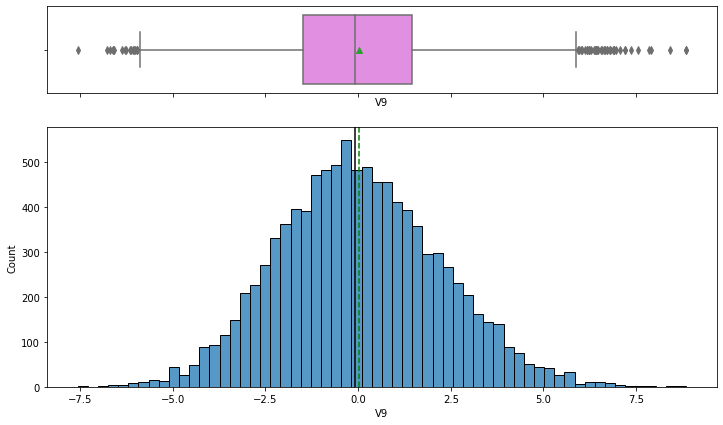

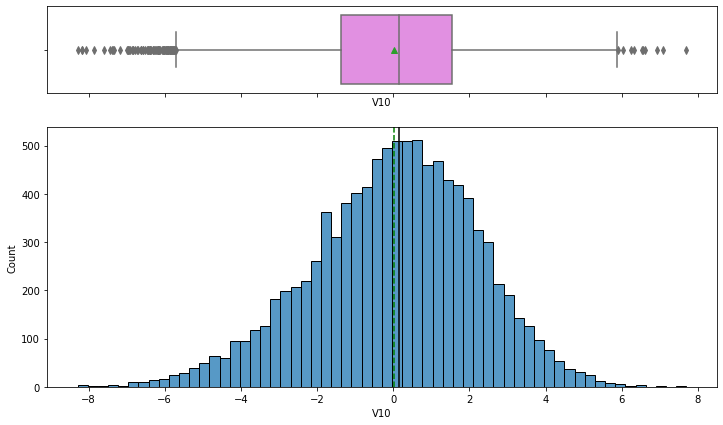

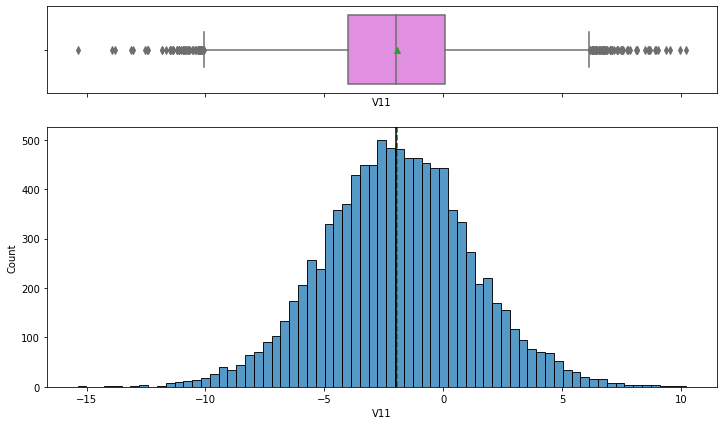

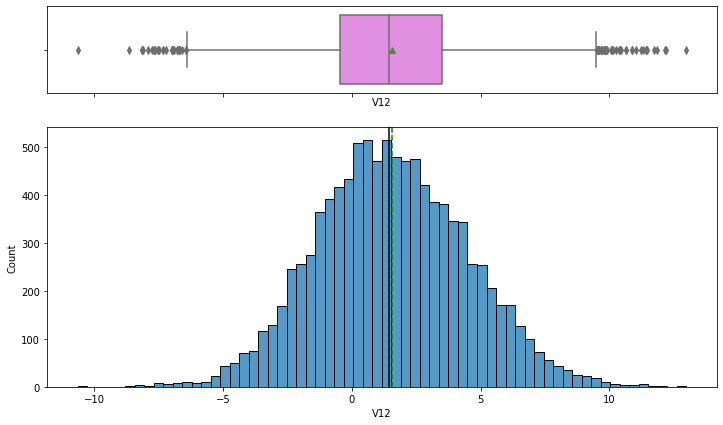

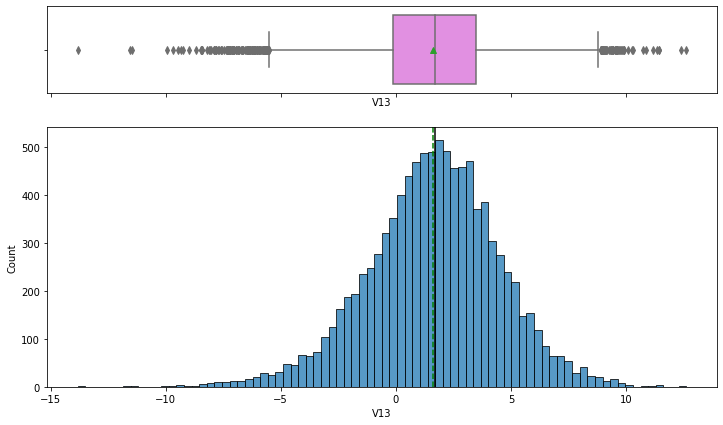

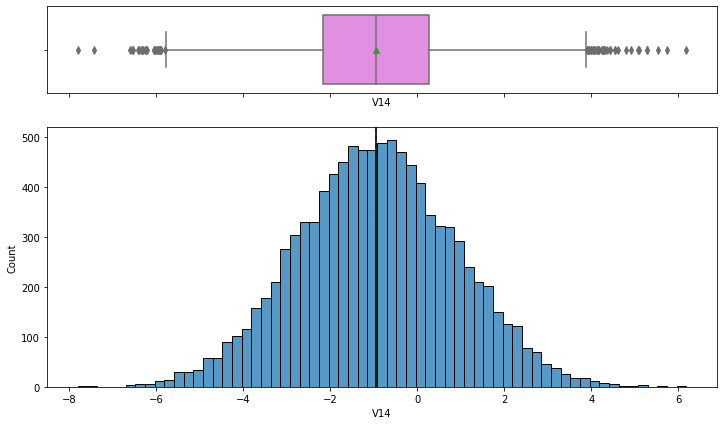

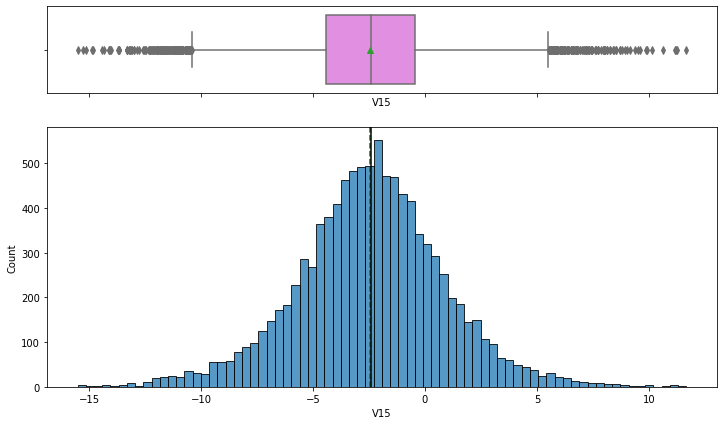

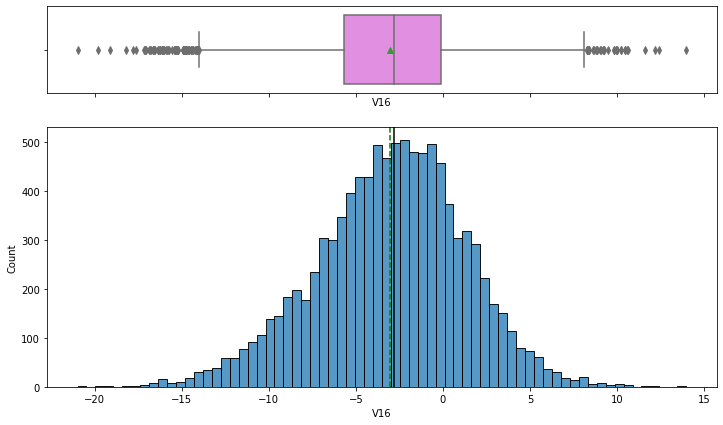

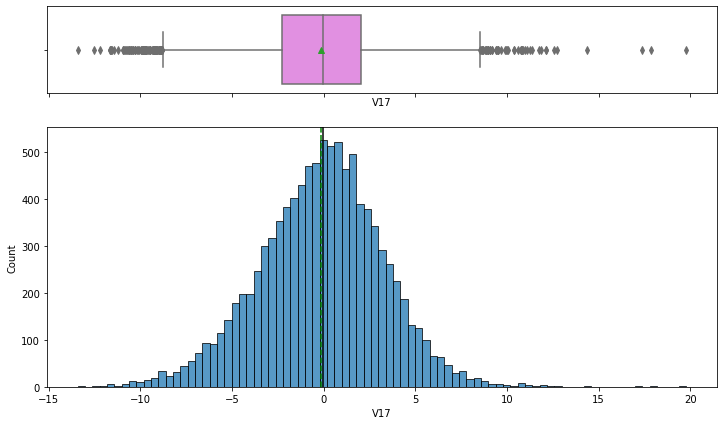

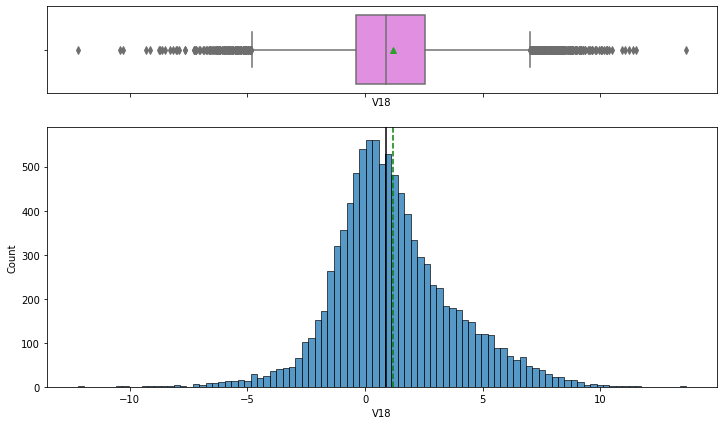

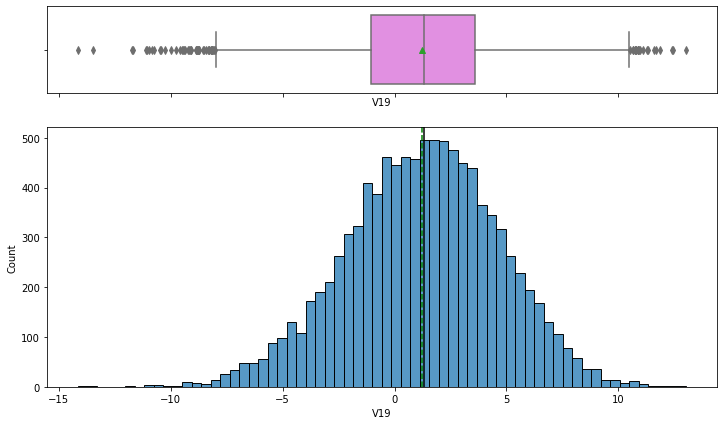

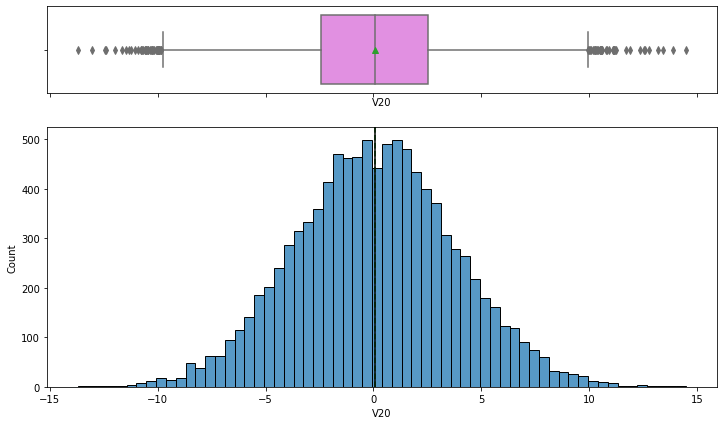

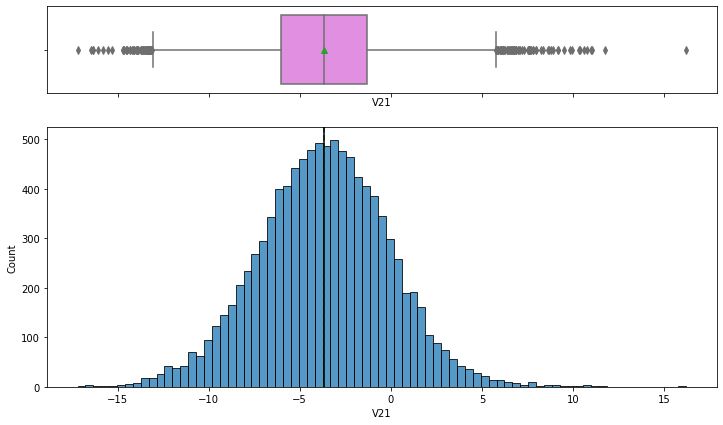

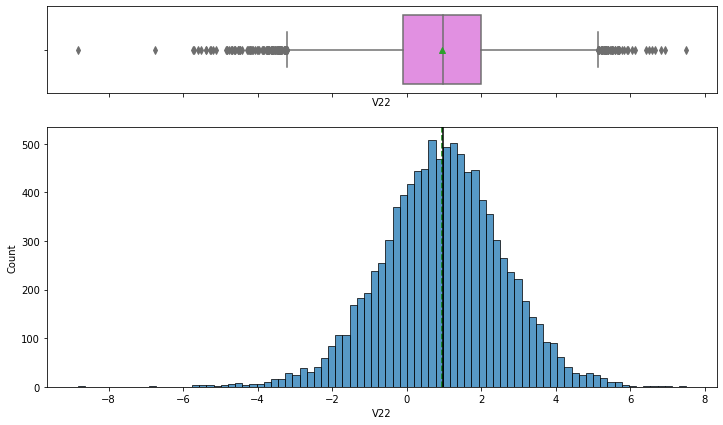

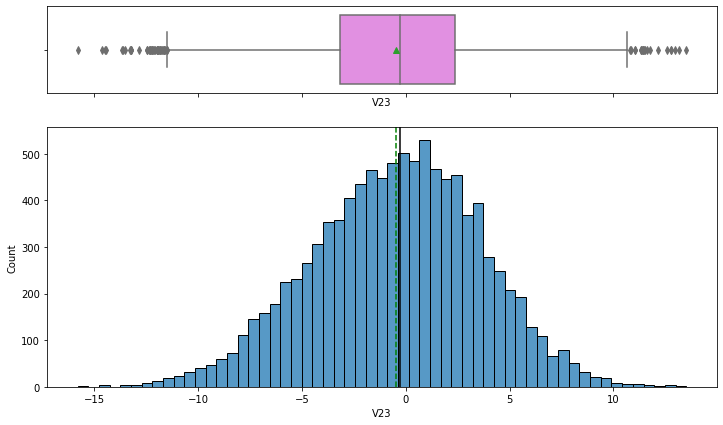

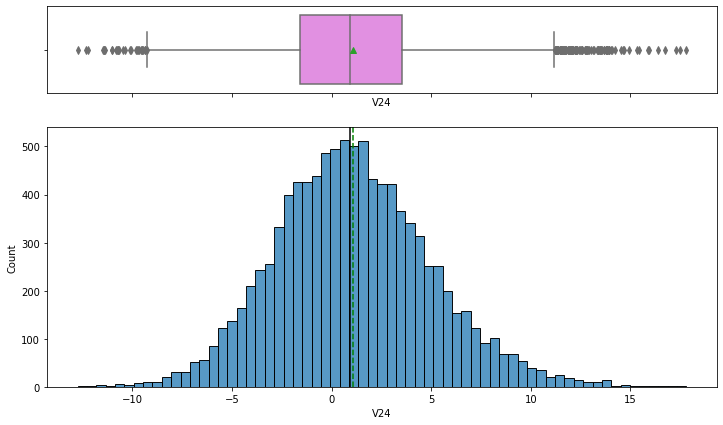

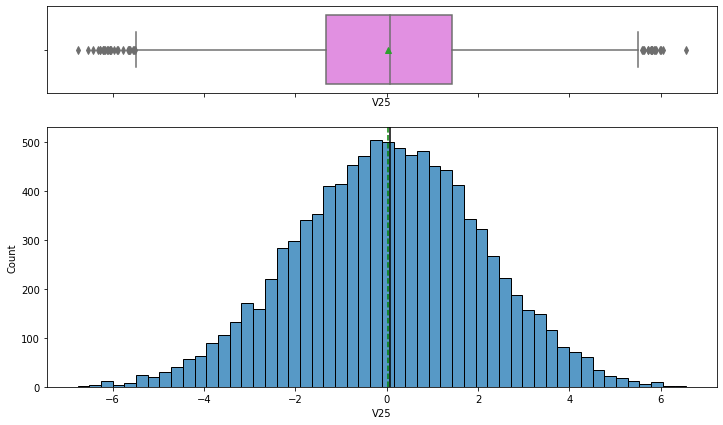

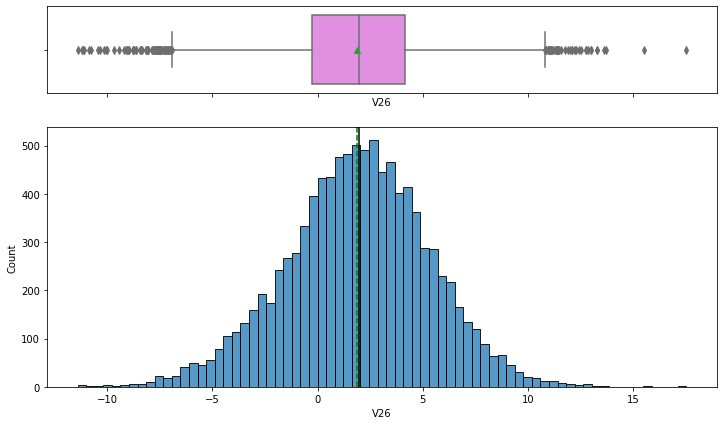

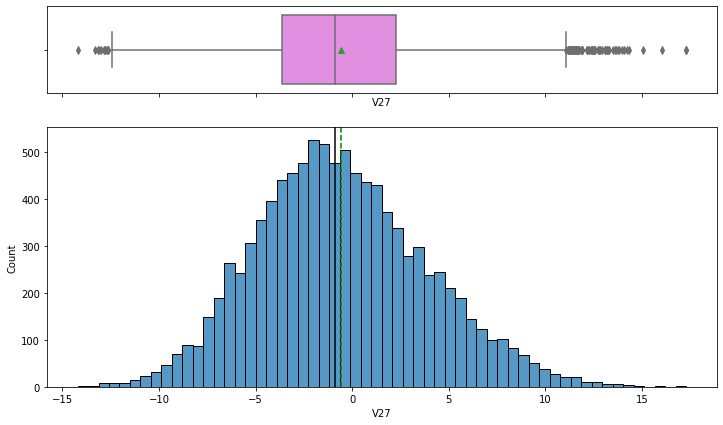

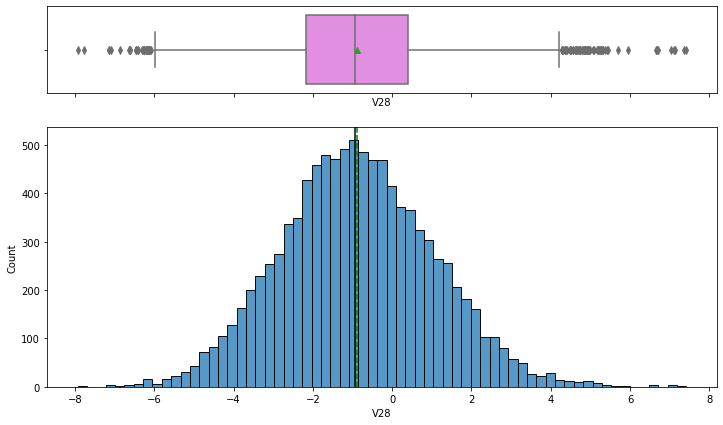

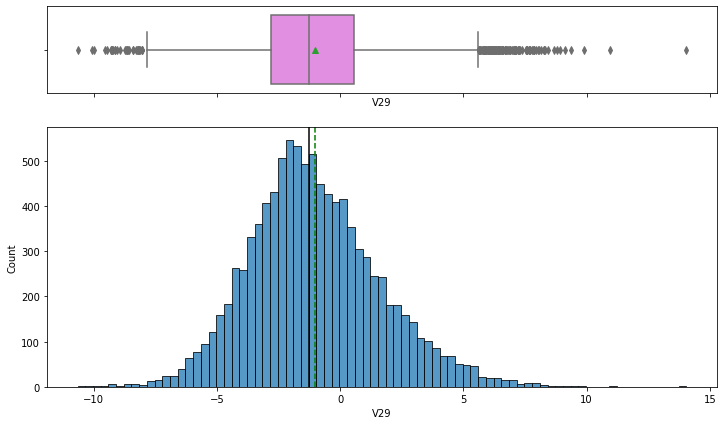

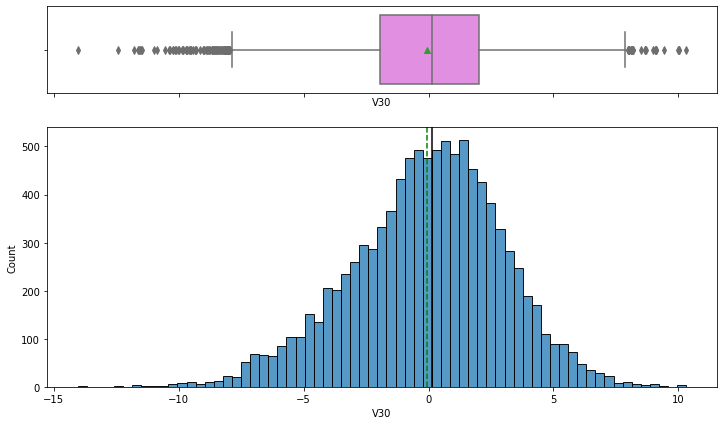

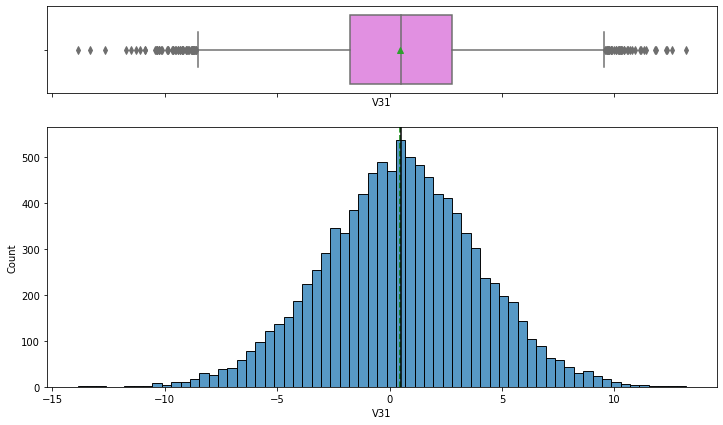

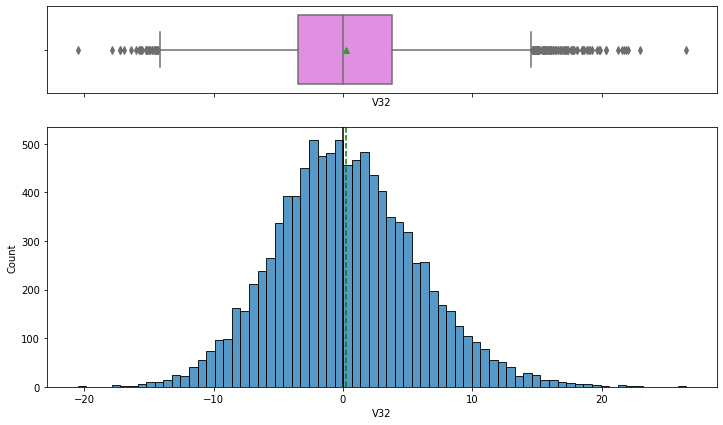

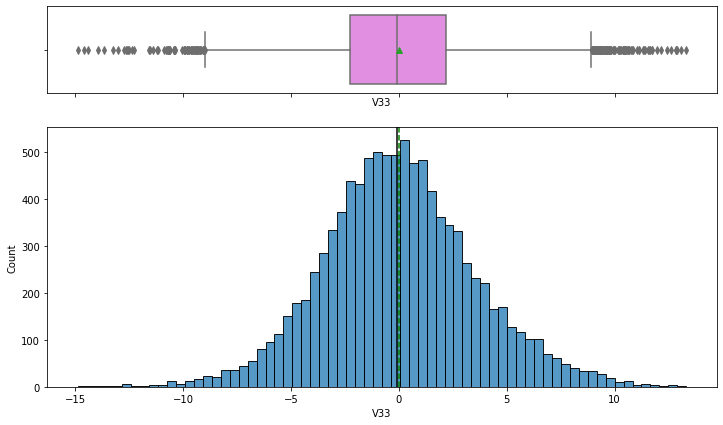

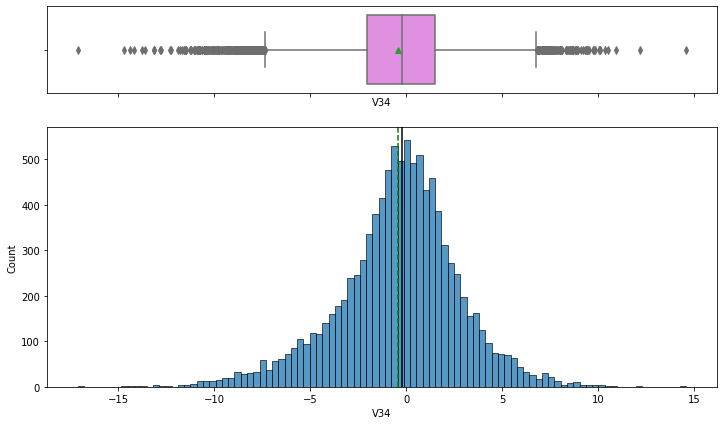

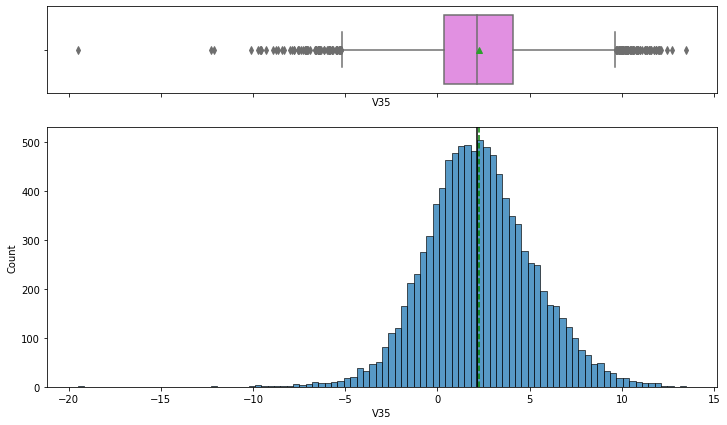

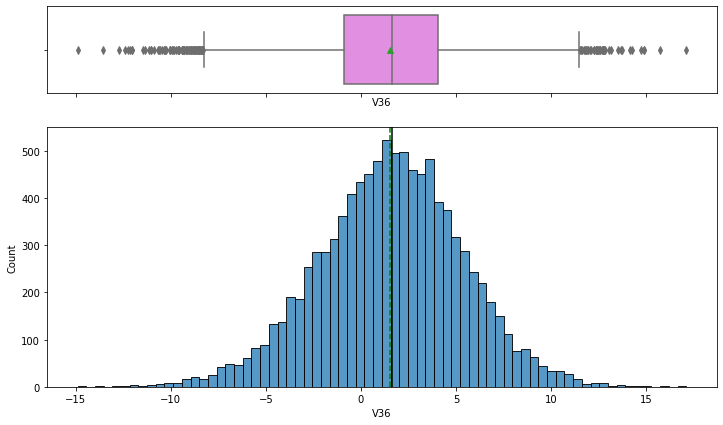

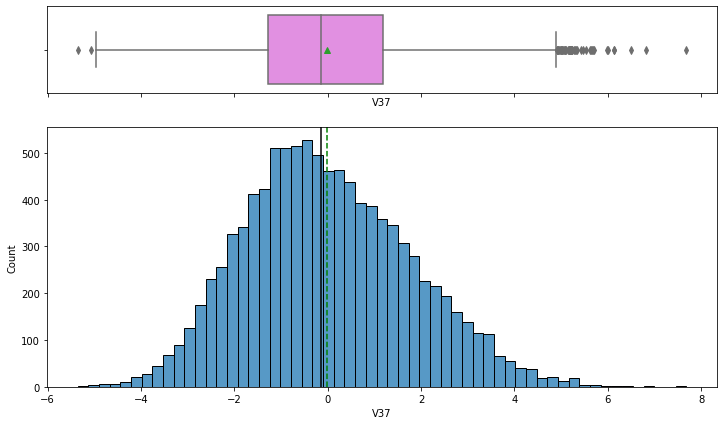

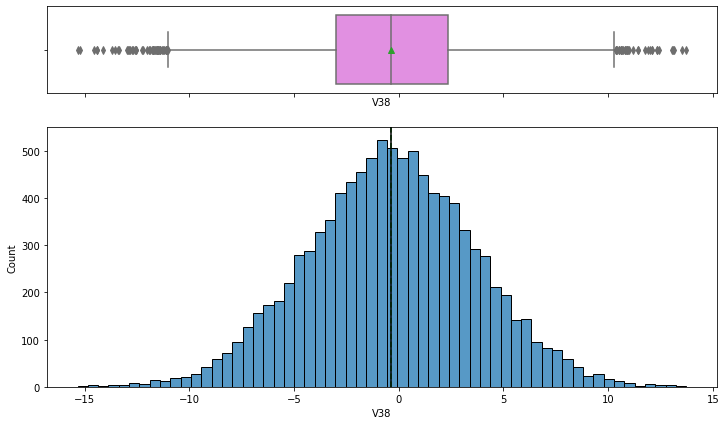

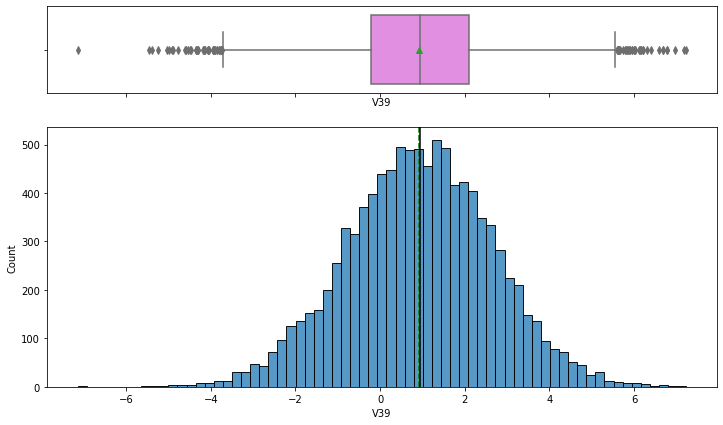

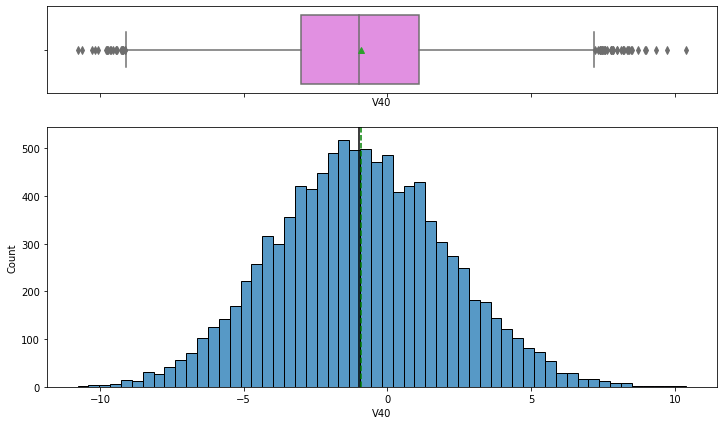

<IPython.core.display.Javascript object>

In [26]:
# Observations on Test dataset excluding "Target":
for feature in hbte.columns:
    histogram_boxplot(hbte, feature, figsize=(12, 7), kde=False, bins=None)

**Observations:**
* Again, a normal distributions is oberved throughout, with outliers on both sides.
* V22 and V35 veer noticably to the right but maintain normal curves.

In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

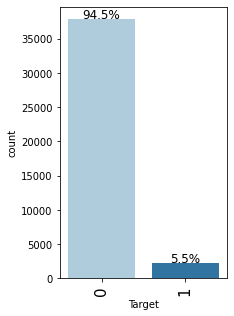

<IPython.core.display.Javascript object>

In [28]:
# Observations on 'Target' for Train dataset:
labeled_barplot(df1, "Target", perc=True)

**Observations:**
* The imbalance in the target variable is further highlighted by this visualization.
* Less than 6% failures noted from the dataset.

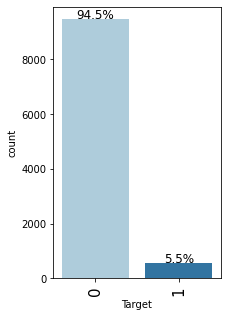

<IPython.core.display.Javascript object>

In [29]:
# Observations on target variable for Test dataset:
labeled_barplot(df2, "Target", perc=True)

**Observations**
* As noted earlier from the statistical summary, "Target" distribution is identical for both datasets. The both have the same degree of imbalance.

### Bivariate Analysis:

In [30]:
df1.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
V1,1.000,0.311,0.391,-0.301,-0.518,0.174,0.483,-0.361,0.399,-0.017,0.291,-0.144,0.065,-0.268,0.414,-0.335,-0.355,-0.392,0.125,-0.341,-0.395,0.207,-0.437,-0.520,0.678,0.224,0.689,-0.286,-0.069,-0.468,0.089,-0.637,-0.295,-0.017,0.140,-0.116,-0.352,0.144,-0.112,0.213,0.072
V2,0.311,1.000,0.093,0.290,0.382,0.240,0.454,-0.390,0.281,-0.479,0.159,-0.165,-0.388,-0.854,0.223,-0.248,0.164,-0.300,0.122,-0.588,-0.064,-0.093,-0.183,0.224,-0.125,0.785,-0.200,0.040,0.177,-0.216,-0.046,-0.117,0.203,-0.277,-0.056,-0.577,-0.441,0.659,-0.347,0.152,0.003
V3,0.391,0.093,1.000,-0.038,-0.360,-0.290,-0.154,-0.413,0.233,0.452,-0.337,-0.168,0.334,-0.218,-0.058,-0.533,-0.420,-0.267,0.396,-0.041,-0.658,-0.200,-0.787,-0.274,0.603,0.462,0.507,-0.417,-0.451,-0.613,0.468,-0.375,-0.225,0.226,0.495,0.447,-0.502,-0.076,0.538,-0.301,-0.217
V4,-0.301,0.290,-0.038,1.000,0.081,-0.465,-0.197,0.032,0.268,-0.114,-0.358,-0.233,-0.276,-0.227,-0.154,-0.197,0.612,-0.410,0.598,0.416,-0.082,-0.030,0.040,0.513,-0.274,0.099,-0.589,0.667,-0.178,0.128,-0.384,0.378,-0.052,0.302,0.336,-0.563,-0.348,0.098,-0.388,-0.669,0.116
V5,-0.518,0.382,-0.360,0.081,1.000,0.161,-0.083,0.165,-0.301,-0.342,-0.212,-0.019,-0.336,-0.147,-0.150,0.265,0.326,0.441,-0.506,-0.362,0.384,-0.086,0.455,0.666,-0.603,0.405,-0.659,-0.034,0.095,0.144,0.300,0.622,0.464,-0.609,-0.341,-0.043,0.066,0.174,-0.216,0.337,-0.100
V6,0.174,0.240,-0.290,-0.465,0.161,1.000,0.215,-0.559,0.080,-0.113,0.709,-0.397,-0.236,-0.349,0.149,-0.084,-0.453,0.283,-0.414,-0.698,0.226,-0.069,-0.185,-0.190,-0.192,0.152,0.214,-0.177,0.584,0.148,-0.111,-0.287,0.587,-0.399,-0.318,-0.247,-0.075,0.632,-0.026,0.422,-0.006
V7,0.483,0.454,-0.154,-0.197,-0.083,0.215,1.000,0.086,-0.241,-0.171,0.533,0.392,-0.495,-0.322,0.870,0.397,0.022,-0.563,0.137,-0.414,0.469,-0.276,-0.054,-0.212,0.204,0.022,0.293,0.189,0.310,-0.250,-0.034,-0.460,-0.266,0.233,-0.437,-0.279,-0.014,0.469,-0.236,0.477,0.240
V8,-0.361,-0.390,-0.413,0.032,0.165,-0.559,0.086,1.000,-0.610,-0.184,-0.191,0.680,-0.097,0.547,0.168,0.802,0.512,-0.019,-0.154,0.441,0.480,-0.041,0.720,0.250,-0.208,-0.507,-0.419,0.167,0.063,0.369,0.145,0.476,-0.245,0.049,-0.161,0.154,0.529,-0.616,-0.347,0.257,0.137
V9,0.399,0.281,0.233,0.268,-0.301,0.080,-0.241,-0.610,1.000,-0.290,-0.094,-0.631,0.390,-0.236,-0.391,-0.755,-0.037,-0.051,0.047,0.132,-0.596,0.319,-0.344,-0.391,0.319,0.313,0.177,-0.092,-0.244,-0.288,-0.458,-0.373,-0.148,-0.093,0.114,-0.349,-0.201,0.039,0.004,-0.314,0.011
V10,-0.017,-0.479,0.452,-0.114,-0.342,-0.113,-0.171,-0.184,-0.290,1.000,-0.153,-0.122,0.070,0.338,0.087,-0.116,-0.515,-0.148,0.408,0.050,-0.124,-0.189,-0.466,-0.013,0.282,-0.215,0.506,0.023,-0.431,-0.320,0.409,-0.030,-0.111,0.511,0.340,0.562,-0.405,-0.006,0.567,-0.467,-0.057


<IPython.core.display.Javascript object>

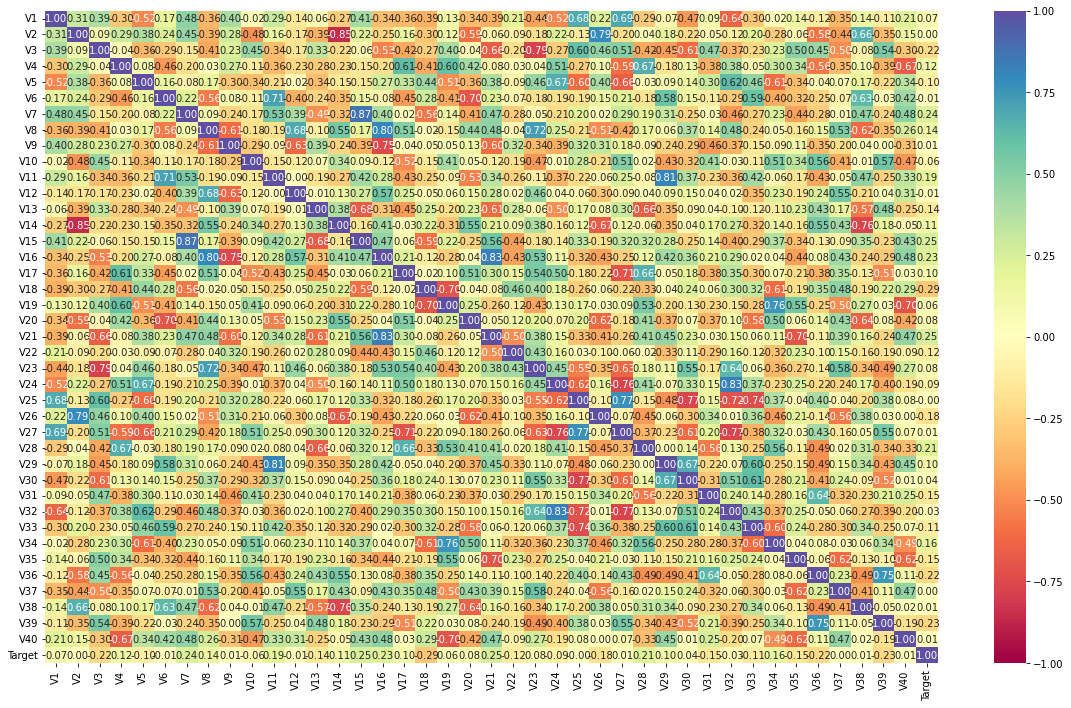

<IPython.core.display.Javascript object>

In [31]:
# Plot a correlation heatmap:
plt.figure(figsize=(20, 12))
sns.heatmap(df1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* A lot of high positive and negative correlations observed.

### Outlier Treatment:

* We observed outliers during EDA but we will not be treating them  due to the fact that the data is ciphered and we have no means of knowing whether or not a value is abnormal.
* Also, given the frequency of these outliers, it is safe to assume that they are proper values and treat them as such.


## Data Pre-processing

In [32]:
# Separating variables (Train):
X = df1.drop(columns="Target")
y = df1["Target"]

<IPython.core.display.Javascript object>

In [33]:
# Separating variables (Test):
X_test = df2.drop(columns="Target")
y_test = df2["Target"]

<IPython.core.display.Javascript object>

In [34]:
# Splitting the training data into Training and Validation sets:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)
print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


<IPython.core.display.Javascript object>

### Missing value imputation:
Here we impute the median value into columns V1 and V2 of both datasets.

In [35]:
# Pass a list of the columns for imputation:
col_for_impute = ["V1", "V2"]

<IPython.core.display.Javascript object>

In [36]:
df1[col_for_impute].head()  # Checking

,V1,V2
0,-4.465,-4.679
1,-2.910,-2.569
2,4.284,5.105
3,3.366,3.653
4,-3.832,-5.824


<IPython.core.display.Javascript object>

In [37]:
# To impute the median value into every data split:
imputer = SimpleImputer(strategy="median")
impute = imputer.fit(X_train)

X_train[col_for_impute] = impute.fit_transform(X_train[col_for_impute])
X_val[col_for_impute] = imputer.transform(X_val[col_for_impute])
X_test[col_for_impute] = imputer.transform(X_test[col_for_impute])

<IPython.core.display.Javascript object>

**Let's confirm that there are no more missing values:**

In [38]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

<IPython.core.display.Javascript object>

Missing values have been filled.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [40]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [41]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

<IPython.core.display.Javascript object>

### Model Building with original data

In [42]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("lr", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 0.48292682926829267
Bagging: 0.7347560975609755
Random forest: 0.7621951219512195
GBM: 0.7170731707317073
Adaboost: 0.6164634146341463
Xgboost: 0.8158536585365853
dtree: 0.7335365853658538

Training Performance:

lr: 0.4853658536585366
Bagging: 0.9439024390243902
Random forest: 1.0
GBM: 0.7804878048780488
Adaboost: 0.6371951219512195
Xgboost: 1.0
dtree: 1.0


<IPython.core.display.Javascript object>

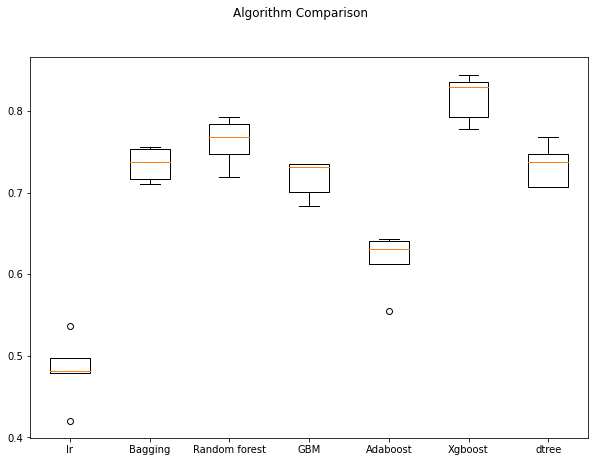

<IPython.core.display.Javascript object>

In [43]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

**Observations:**
    
* DecisionTree, Xgboost, Bagging and RandomForest appear to overfit on training data.
* LogisticRegression is giving the weakest performance.
* Xgboost has the highest score.

#### Model Performance on validation set:

In [44]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 0.48292682926829267
Bagging: 0.7347560975609755
Random forest: 0.7621951219512195
GBM: 0.7170731707317073
Adaboost: 0.6164634146341463
Xgboost: 0.8158536585365853
dtree: 0.7335365853658538

Validation Performance:

Logistic regression: 0.4625228519195612
Bagging: 0.7349177330895795
Random forest: 0.7659963436928702
GBM: 0.7148080438756855
Adaboost: 0.6142595978062158
Xgboost: 0.8263254113345521
dtree: 0.7477148080438757


<IPython.core.display.Javascript object>

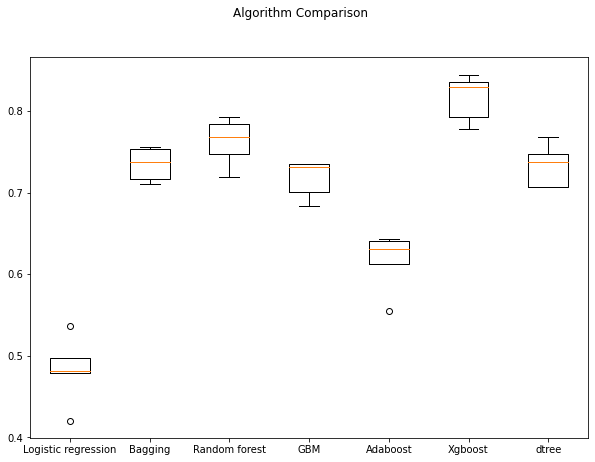

<IPython.core.display.Javascript object>

In [45]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations:**
* The models give a more generalized performance on the validation set though LogisticRegression and AdaBoost maintain the lowest scores.
* Xgboost again performs best.

### Model Building with Oversampled data


### Oversampling:

In [46]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [47]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1640
Before OverSampling, count of label '0': 28360 

After OverSampling, count of label '1': 28360
After OverSampling, count of label '0': 28360 

After OverSampling, the shape of train_X: (56720, 40)
After OverSampling, the shape of train_y: (56720,) 



<IPython.core.display.Javascript object>

#### Training the models with oversampled data:

In [48]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("lr", LogisticRegression(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_os = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_over:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_os.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Training Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 0.8754583921015515
Bagging: 0.9730606488011284
Random forest: 0.9817348377997179
GBM: 0.9148095909732017
Adaboost: 0.8933004231311706
Xgboost: 0.9843794076163611
dtree: 0.9722143864598026

Training Performance:

lr: 0.8755641748942172
Bagging: 0.9982722143864599
Random forest: 1.0
GBM: 0.9144922425952046
Adaboost: 0.8938293370944993
Xgboost: 0.9986248236953456
dtree: 1.0


<IPython.core.display.Javascript object>

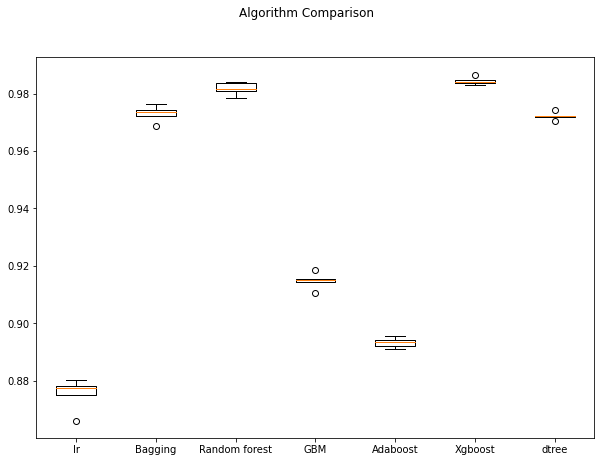

<IPython.core.display.Javascript object>

In [49]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_os)
ax.set_xticklabels(names)

plt.show()

**Observations:**
* Oversampling greatly improved the LogisticRegression performance.
* There is overfitting on the training data however.
* Xgboost is still ahead of the others in performance.

#### Let us see how oversampling affects the validation dataset:

In [50]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("lr", LogisticRegression(random_state=1)))
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_os1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_over:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_os1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 0.8754583921015515
Bagging: 0.9730606488011284
Random forest: 0.9817348377997179
GBM: 0.9148095909732017
Adaboost: 0.8933004231311706
Xgboost: 0.9843794076163611
dtree: 0.9722143864598026

Validation Performance:

lr: 0.8391224862888482
Bagging: 0.8354661791590493
Random forest: 0.8683729433272395
GBM: 0.8811700182815356
Adaboost: 0.850091407678245
Xgboost: 0.8793418647166362
dtree: 0.8135283363802559


<IPython.core.display.Javascript object>

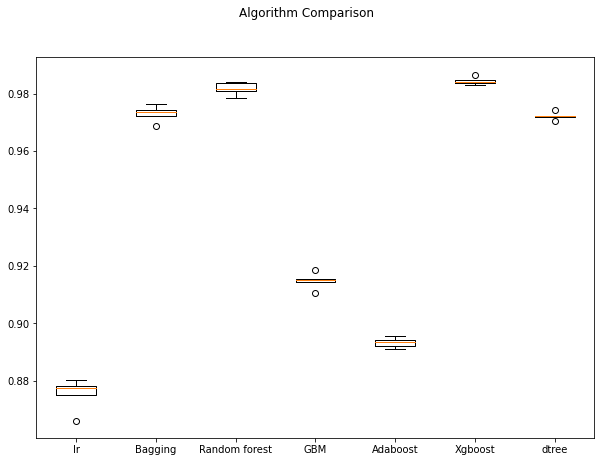

<IPython.core.display.Javascript object>

In [51]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_os1)
ax.set_xticklabels(names)

plt.show()

**Observations:**
* The model performances on validation data are good after oversampling and they generalize better.
* Xgboost maintains the lead in CV performance scores.

### Model Building with Undersampled data

In [52]:
# Random undersampler for undersampling the data:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [53]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After Undersampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label '1': 1640
Before Undersampling, counts of label '0': 28360 

After Undersampling, counts of label '1': 1640
After Undersampling, counts of label '0': 1640 

After Undersampling, the shape of train_X: (3280, 40)
After Undersampling, the shape of train_y: (3280,) 



<IPython.core.display.Javascript object>

### Tuning the models with undersampled data:

In [54]:
models_und = []  # Empty list to store all the models

# Appending models into the list
models_und.append(("lr", LogisticRegression(random_state=1)))
models_und.append(("Bagging", BaggingClassifier(random_state=1)))
models_und.append(("Random forest", RandomForestClassifier(random_state=1)))
models_und.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_und.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_und.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_und.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_un = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_und:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results_un.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Training Performance:" "\n")

for name, model in models_und:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 0.8554878048780488
Bagging: 0.875
Random forest: 0.8981707317073171
GBM: 0.8871951219512194
Adaboost: 0.8725609756097562
Xgboost: 0.8939024390243903
dtree: 0.8591463414634146

Training Performance:

lr: 0.8554878048780488
Bagging: 0.9798780487804878
Random forest: 1.0
GBM: 0.9182926829268293
Adaboost: 0.8939024390243903
Xgboost: 1.0
dtree: 1.0


<IPython.core.display.Javascript object>

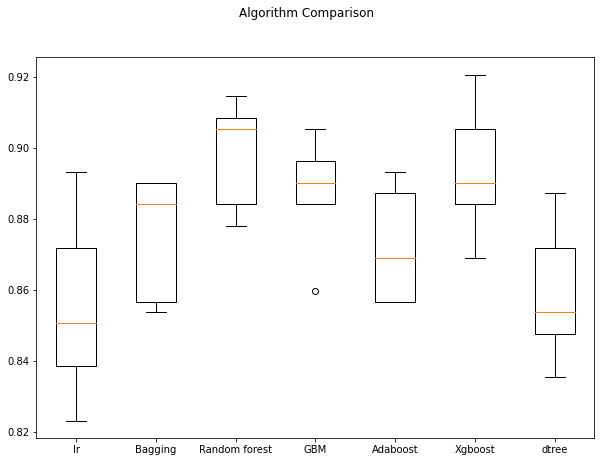

<IPython.core.display.Javascript object>

In [55]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names)

plt.show()

**Observations:**
* The models overfit on Training data even with undersampling.
* LogisticRegression is still performing better than on the original dataset.
* RandomForest has the best score.

#### Let's check out the performances on validation data:

In [56]:
models_und = []  # Empty list to store all the models

# Appending models into the list
models_und.append(("lr", LogisticRegression(random_state=1)))
models_und.append(("Bagging", BaggingClassifier(random_state=1)))
models_und.append(("Random forest", RandomForestClassifier(random_state=1)))
models_und.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_und.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_und.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_und.append(("dtree", DecisionTreeClassifier(random_state=1)))

results_un1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models_und:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results_un1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models_und:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

lr: 0.8554878048780488
Bagging: 0.875
Random forest: 0.8981707317073171
GBM: 0.8871951219512194
Adaboost: 0.8725609756097562
Xgboost: 0.8939024390243903
dtree: 0.8591463414634146

Validation Performance:

lr: 0.8464351005484461
Bagging: 0.8628884826325411
Random forest: 0.8848263254113345
GBM: 0.8884826325411335
Adaboost: 0.8647166361974405
Xgboost: 0.9012797074954296
dtree: 0.8537477148080439


<IPython.core.display.Javascript object>

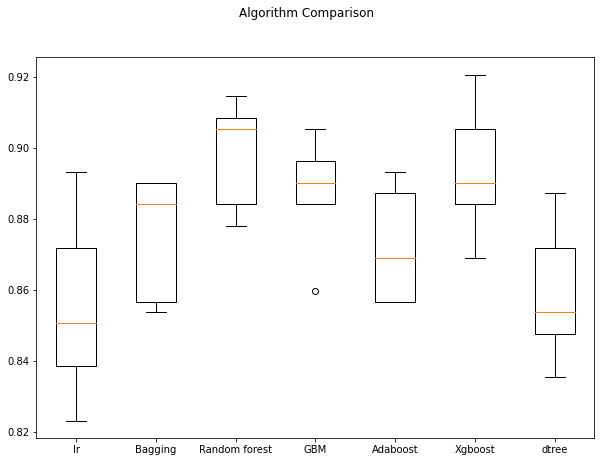

<IPython.core.display.Javascript object>

In [57]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_un1)
ax.set_xticklabels(names)

plt.show()

**Observations:**
* The models perform well on the undersampled validation set.
* Xgboost gives the best performance, followed by RandomForest.

**The highest CV scores are on XgBoost, RandomForest and Bagging models on oversampled data. They have been selected because they have high recall scores as well as acceptable accuracy, precision and F1 scores.**

**We will tune these models using RandomizedSearchCV and see if their performances can be improved.**

**We will be comparing model performance as well as runtime to pick the best.**

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## XGBoost

### Tuning XGBoost on oversampled data:

In [58]:
%%time

# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = { 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
xgb_tune1 = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
xgb_tune1.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_tune1.best_params_,xgb_tune1.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9959802538787024:
CPU times: total: 5min 47s
Wall time: 22min 29s


<IPython.core.display.Javascript object>

In [59]:
# building model with best parameters
xgb_tune1 = XGBClassifier(
    random_state=1,
    n_estimators=250,
    scale_pos_weight=10,
    gamma=5,
    subsample=0.9,
    learning_rate=0.1,
    eval_metric="logloss",
)
# Fit the model on oversampled training data:
xgb_tune1.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [60]:
# Calculating different metrics on train set
xgboost_random_train1 = model_performance_classification_sklearn(
    xgb_tune1, X_train_over, y_train_over
)
print("Training performance:")
xgboost_random_train1

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994,1.000,0.988,0.994


<IPython.core.display.Javascript object>

In [61]:
# Calculating different metrics on validation set
xgboost_random_val1 = model_performance_classification_sklearn(xgb_tune1, X_val, y_val)
print("Validation performance:")
xgboost_random_val1

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.974,0.905,0.702,0.791


<IPython.core.display.Javascript object>

All scores drop but Recall is still good. Precision and F1 are not so good in comparison.

#### Let's see the confusion matrices with oversampling:

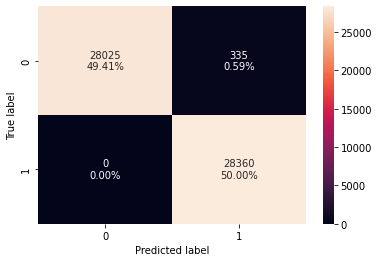

<IPython.core.display.Javascript object>

In [62]:
# creating confusion matrix on train
confusion_matrix_sklearn(xgb_tune1, X_train_over, y_train_over)

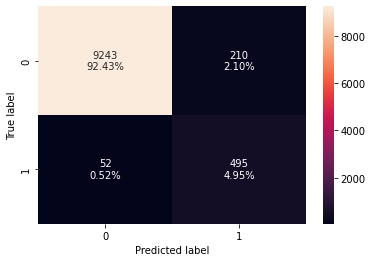

<IPython.core.display.Javascript object>

In [63]:
# creating confusion matrix on validation
confusion_matrix_sklearn(xgb_tune1, X_val, y_val)

## Random Forest

### Tuning RandomForest on oversampled data:

In [64]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
rf_tune1 = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
rf_tune1.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(rf_tune1.best_params_,rf_tune1.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9780324400564175:
CPU times: total: 52 s
Wall time: 21min 31s


<IPython.core.display.Javascript object>

In [65]:
# Build the model with the best parameters:
rf_tune1 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.6,
    n_estimators=250,
    min_samples_leaf=1,
)

# Fit the model on oversampled training data:
rf_tune1.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

In [66]:
# Calculating different metrics on train set
rf1_random_train = model_performance_classification_sklearn(
    rf_tune1, X_train_over, y_train_over
)
print("Training performance:")
rf1_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


<IPython.core.display.Javascript object>

In [67]:
# Calculating different metrics on valuation set
rf1_random_val = model_performance_classification_sklearn(rf_tune1, X_val, y_val)
print("Valuation performance:")
rf1_random_val

Valuation performance:


,Accuracy,Recall,Precision,F1
0,0.990,0.872,0.948,0.909


<IPython.core.display.Javascript object>

Recall drops but is still within an acceptable range. The other scores are quite good.

#### Create the confusion matrices:

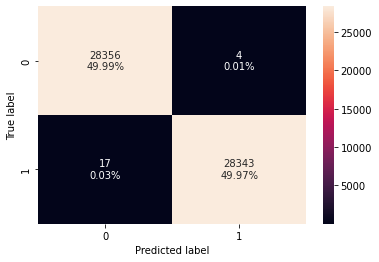

<IPython.core.display.Javascript object>

In [68]:
# creating confusion matrix on training data
confusion_matrix_sklearn(rf_tune1, X_train_over, y_train_over)

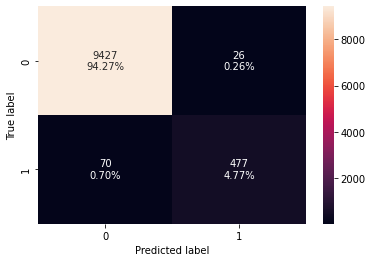

<IPython.core.display.Javascript object>

In [69]:
# creating confusion matrix on validation data
confusion_matrix_sklearn(rf_tune1, X_val, y_val)

## Bagging

### Tuning Bagging on oversampled data:

In [70]:
%%time 

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70] }

#Calling RandomizedSearchCV
bgg_tune1 = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
bgg_tune1.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(bgg_tune1.best_params_,bgg_tune1.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 1, 'max_features': 0.7} with CV score=1.0:
CPU times: total: 1.31 s
Wall time: 27min 53s


<IPython.core.display.Javascript object>

In [71]:
# Build the model with best parameters
bgg_tune1 = BaggingClassifier(
    max_features=0.7, random_state=1, max_samples=1, n_estimators=50
)
# Fit the model on training data:
bgg_tune1.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.7, max_samples=1, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

In [72]:
# Calculating different metrics on train set
bag1_random_train = model_performance_classification_sklearn(
    bgg_tune1, X_train_over, y_train_over
)
print("Training performance:")
bag1_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.500,1.000,0.500,0.667


<IPython.core.display.Javascript object>

In [73]:
# Calculating different metrics on validation set
bag1_random_val = model_performance_classification_sklearn(bgg_tune1, X_val, y_val)

print("Validation performance:")
bag1_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.055,1.000,0.055,0.104


<IPython.core.display.Javascript object>

#### Create the confusion matrices:

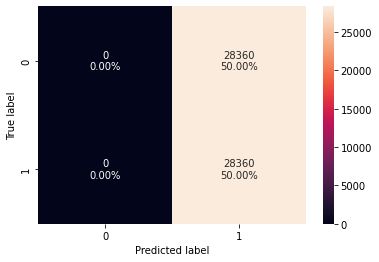

<IPython.core.display.Javascript object>

In [74]:
# creating confusion matrix for training data
confusion_matrix_sklearn(bgg_tune1, X_train_over, y_train_over)

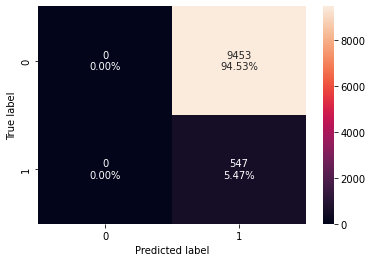

<IPython.core.display.Javascript object>

In [75]:
# creating confusion matrix for validation data
confusion_matrix_sklearn(bgg_tune1, X_val, y_val)

This model does very poorly on both training and validation sets. Recall overfits and all other scores are low.

## Decision Tree

### Tuning Decision Tree on oversampled data

In [76]:
%%time 

# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_depth': np.arange(2,6), 'min_samples_leaf': [1, 4, 7], 'max_leaf_nodes' : [10, 15], 'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
dtree_tune1 = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
dtree_tune1.fit(X_train_over, y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(dtree_tune1.best_params_,dtree_tune1.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.8526093088857545:
CPU times: total: 2.75 s
Wall time: 49.7 s


<IPython.core.display.Javascript object>

In [77]:
# Build the model with best parameters
dtree_tune1 = DecisionTreeClassifier(
    min_samples_leaf=1,
    random_state=1,
    max_leaf_nodes=15,
    min_impurity_decrease=0.0001,
    max_depth=5,
)
# Fit the model on training data:
dtree_tune1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

In [78]:
# Calculating different metrics on train set
dtree1_random_train = model_performance_classification_sklearn(
    dtree_tune1, X_train_over, y_train_over
)
print("Training performance:")
dtree1_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.896,0.858,0.929,0.892


<IPython.core.display.Javascript object>

In [79]:
# Calculating different metrics on validation set
dtree1_random_val = model_performance_classification_sklearn(dtree_tune1, X_val, y_val)

print("Validation performance:")
dtree1_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.924,0.808,0.404,0.539


<IPython.core.display.Javascript object>

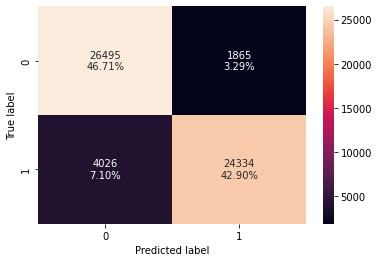

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix on training
confusion_matrix_sklearn(dtree_tune1, X_train_over, y_train_over)

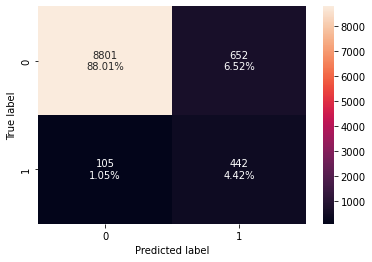

<IPython.core.display.Javascript object>

In [81]:
# creating confusion matrix on validation
confusion_matrix_sklearn(dtree_tune1, X_val, y_val)

This model did not benefit from tuning. Gives a poor performance on both train and validation sets.

## Model performance comparison and choosing the final model

### Let's compare the models and see how they fare:

In [82]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        xgboost_random_train1.T,
        rf1_random_train.T,
        bag1_random_train.T,
        dtree1_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost tuned on oversampled data",
    "Random Forest tuned on oversampled data",
    "Bagging Classifier tuned on oversampled data",
    "Decision Tree Classifier tuned on oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost tuned on oversampled data,Random Forest tuned on oversampled data,Bagging Classifier tuned on oversampled data,Decision Tree Classifier tuned on oversampled data
Accuracy,0.994,1.000,0.500,0.896
Recall,1.000,0.999,1.000,0.858
Precision,0.988,1.000,0.500,0.929
F1,0.994,1.000,0.667,0.892


<IPython.core.display.Javascript object>

In [83]:
# Validation performance comparison

models_validation_comp_df = pd.concat(
    [xgboost_random_val1.T, rf1_random_val.T, bag1_random_val.T, dtree1_random_val.T],
    axis=1,
)
models_validation_comp_df.columns = [
    "XGBoost tuned on oversampled data",
    "Random Forest tuned on oversampled data",
    "Bagging Classifier tuned on oversampled data",
    "Decision Tree tuned on oversampled data",
]
print("Validation performance comparison:")
models_validation_comp_df

Validation performance comparison:


,XGBoost tuned on oversampled data,Random Forest tuned on oversampled data,Bagging Classifier tuned on oversampled data,Decision Tree tuned on oversampled data
Accuracy,0.974,0.990,0.055,0.924
Recall,0.905,0.872,1.000,0.808
Precision,0.702,0.948,0.055,0.404
F1,0.791,0.909,0.104,0.539


<IPython.core.display.Javascript object>

* Tuned XGBoost is giving the highest recall scores.
* We will test the final performance with Xgboost.

### Test set final performance

In [84]:
# Running the selected model on the test dataset:
xgboost_random_test = model_performance_classification_sklearn(
    xgb_tune1, X_test, y_test
)
print("Test performance:")
xgboost_random_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.971,0.885,0.683,0.771


<IPython.core.display.Javascript object>

We have a generalised performance on the test set.

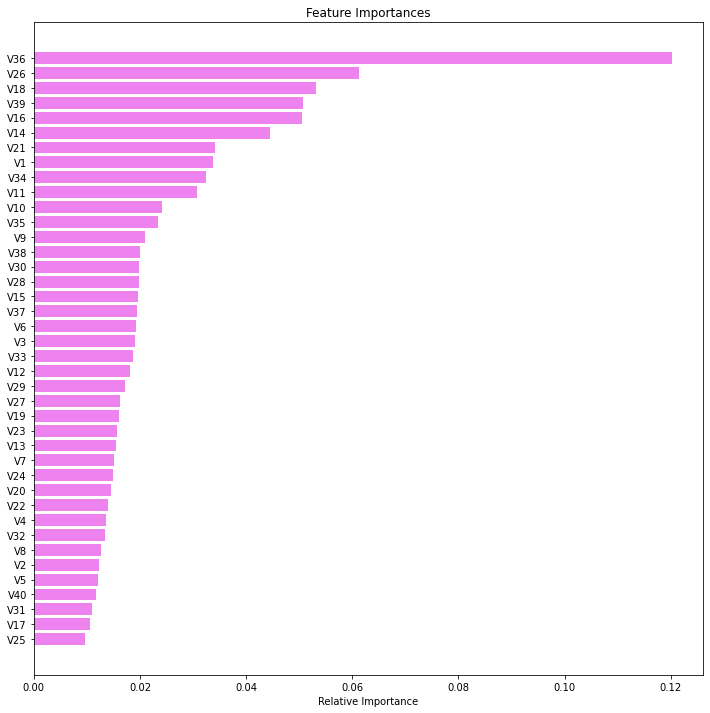

<IPython.core.display.Javascript object>

In [85]:
feature_names = X.columns
importances = xgb_tune1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important feature by far is V36.

## Pipelines to build the final model


First, merge the original data sets into one.

In [86]:
# Combine the train and test datasets into one.
df3 = pd.concat([df2, df1])

<IPython.core.display.Javascript object>

In [87]:
X = df3.drop(columns="Target")
Y = df3["Target"]

<IPython.core.display.Javascript object>

In [88]:
# dividing data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [89]:
# Create the pipeline with best parameters:
Model = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="median")),
        (
            "xgb",
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.9,
                learning_rate=0.1,
                eval_metric="logloss",
            ),
        ),
    ]
)

# Fit the model on training data
Model.fit(X_train, Y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=5, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=10, subsample=0.9,
                               tree_method='exact', validate_parameters=1,
                           

<IPython.core.display.Javascript object>

In [90]:
# Transform and predict on test data:
Model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>

# Business Insights and Conclusions

* Sensor V36 is very important to making accurate predictions on generator failure. It is the most important feature followed by V26 and V18. 
* Routine inspections will help reduce the need for repairs and replacements and as such the business will do well to ensure that these inspections are carried out routinely so that sensors and machines remain functional and failure is kept at the barest minimum. This will drive down maintenance costs by reducing spending on repairs and replacements.
 

***